#### 1. 📦 Import Libraries

In [ ]:
# --- Data Handling and Preprocessing ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import time

# --- Data Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Web Scraping ---
import requests
from bs4 import BeautifulSoup
import re

# --- Machine Learning Models and Tools ---
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor  
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --- Deep Learning Libraries ---
import tensorflow as tf           
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.callbacks import EarlyStopping

# --- System Utilities ---
import random  
import os  

#### 2. 📥 Load Player Dataset

##### 2.1 📊 Overview of Player Stats Data

In [4]:
player_stats = pd.read_csv("Player_Stats.csv", encoding="latin1")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
player_stats.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


##### 2.2 📊 Overview of Player Market Value

In [ ]:
player_list = player_stats['Player'].unique()
base_url = "https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query="
player_market_values = []
total_players = len(player_list)

for i, player in enumerate(player_list, start=1):
    search_url = base_url + player.replace(" ", "+")
    print(f"Processing player {i}/{total_players}: {player}")
    try:
        response = requests.get(search_url, headers={"User-Agent": "Mozilla/5.0"})
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")
        market_value_tag = soup.find("td", class_="rechts hauptlink")
        if market_value_tag:
            market_value = market_value_tag.text.strip()
        else:
            market_value = "Not Found"
        player_market_values.append({"Player": player, "Market Value": market_value})
    except Exception as e:
        player_market_values.append({"Player": player, "Market Value": "Error: " + str(e)})

    time.sleep(2)

In [ ]:
# player_market_values = pd.read_csv("player_market_values.csv", encoding='utf-8')

In [7]:
player_market_values.head()

,Player,Market Value
0,Brenden Aaronson,ÃÂÃÂ¢ÃÂÃÂÃÂÃÂ¬15.00m
1,Yunis Abdelhamid,ÃÂÃÂ¢ÃÂÃÂÃÂÃÂ¬400k
2,Himad Abdelli,ÃÂÃÂ¢ÃÂÃÂÃÂÃÂ¬7.00m
3,Salis Abdul Samed,ÃÂÃÂ¢ÃÂÃÂÃÂÃÂ¬5.50m
4,Laurent Abergel,ÃÂÃÂ¢ÃÂÃÂÃÂÃÂ¬2.50m


#### 3. 🧹 Clean and Prepare Market Value Data

##### 📉 3.1 Data Pre-processing (Clean Currency Format & Remove Missing)

In [8]:
# Remove entries with 'Not Found' or '-' in Market Value column
player_market_values = player_market_values[player_market_values['Market Value'] != 'Not Found']
player_market_values = player_market_values[player_market_values['Market Value'] != '-']

# Function to convert market value strings (e.g., '€5m', '€500k') to numerical Euros
def clean_value(value):
    value = str(value)
    value = value.replace("€", "").replace(",", "").strip()  # Clean euro and commas
    value = re.sub(r"[^\d\.mk]", "", value.lower())  # Remove all non-numeric except . m k

    if "m" in value:
        return float(value.replace("m", "")) * 1_000_000
    elif "k" in value:
        return float(value.replace("k", "")) * 1_000
    else:
        return float(value)

# Apply conversion to numeric euro values
player_market_values["Market Value Euros"] = player_market_values["Market Value"].apply(clean_value)

# Drop original string column
player_market_values.drop(columns=['Market Value'], inplace=True)

# Fill any remaining nulls with a default value
player_market_values['Market Value Euros'] = player_market_values['Market Value Euros'].fillna(1_000_000)

# Show shape and preview
print(player_market_values.shape)
player_market_values.head()

(2295, 2)


,Player,Market Value Euros
0,Brenden Aaronson,15000000.0
1,Yunis Abdelhamid,400000.0
2,Himad Abdelli,7000000.0
3,Salis Abdul Samed,5500000.0
4,Laurent Abergel,2500000.0


In [9]:
# Preview original player stats
player_stats.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


##### 3.2 🔗 Merge Market Values with Player Stats

In [10]:
# Normalize player names for matching
player_stats['Player'] = player_stats['Player'].astype(str).str.strip().str.lower()
player_market_values['Player'] = player_market_values['Player'].astype(str).str.strip().str.lower()

# Remove 'Market Value Euros' if already exists in player_stats
if 'Market Value Euros' in player_stats.columns:
    player_stats = player_stats.drop(columns=['Market Value Euros'])

# Merge market value into main player_stats dataframe
player_stats = player_stats.merge(
    player_market_values[['Player', 'Market Value Euros']],
    how='left',
    on='Player'
)

# Show shape after merge
print(f"After merge: {player_stats.shape}")
player_stats.head()

After merge: (2689, 125)


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Market Value Euros
0,1,brenden aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2,15000000.0
1,2,yunis abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0,400000.0
2,3,himad abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1,7000000.0
3,4,salis abdul samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0,5500000.0
4,5,laurent abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,

##### 3.3 🔍 Explore Feature Uniqueness

In [11]:
# Display number of unique values in each column (print values if <= 12)
for column in player_stats.columns:
    unique_vals = player_stats[column].fillna('0').unique()
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print(f"{column}: {nr_values} unique values -- {unique_vals}")
    else:
        print(f"{column}: {nr_values} unique values")

# Check for missing values
player_stats.isnull().sum()

Rk: 2689 unique values
Player: 2530 unique values
Nation: 105 unique values
Pos: 10 unique values -- ['MFFW' 'DF' 'MF' 'FWMF' 'FW' 'DFFW' 'MFDF' 'GK' 'DFMF' 'FWDF']
Squad: 98 unique values
Comp: 5 unique values -- ['Premier League' 'Ligue 1' 'Serie A' 'La Liga' 'Bundesliga']
Age: 27 unique values
Born: 27 unique values
MP: 23 unique values
Starts: 24 unique values
Min: 1307 unique values
90s: 219 unique values
Goals: 18 unique values
Shots: 375 unique values
SoT: 182 unique values
SoT%: 219 unique values
G/Sh: 42 unique values
G/SoT: 58 unique values
ShoDist: 288 unique values
ShoFK: 69 unique values
ShoPK: 33 unique values
PKatt: 39 unique values
PasTotCmp: 638 unique values
PasTotAtt: 662 unique values
PasTotCmp%: 429 unique values
PasTotDist: 2290 unique values
PasTotPrgDist: 1889 unique values
PasShoCmp: 606 unique values
PasShoAtt: 535 unique values
PasShoCmp%: 353 unique values
PasMedCmp: 745 unique values
PasMedAtt: 658 unique values
PasMedCmp%: 447 unique values
PasLonCmp: 759 

Rk                      0
Player                  0
Nation                  1
Pos                     0
Squad                   0
Comp                    0
Age                     0
Born                    0
MP                      0
Starts                  0
Min                     0
90s                     0
Goals                   0
Shots                   0
SoT                     0
SoT%                    0
G/Sh                    0
G/SoT                   0
ShoDist                 0
ShoFK                   0
ShoPK                   0
PKatt                   0
PasTotCmp               0
PasTotAtt               0
PasTotCmp%              0
PasTotDist              0
PasTotPrgDist           0
PasShoCmp               0
PasShoAtt               0
PasShoCmp%              0
PasMedCmp               0
PasMedAtt               0
PasMedCmp%              0
PasLonCmp               0
PasLonAtt               0
PasLonCmp%              0
Assists                 0
PasAss                  0
Pas3rd      

##### 3.4 🧽 Handle Missing and Duplicate Players

In [12]:
# Replace missing Nation with 'Other'
player_stats['Nation'] = player_stats['Nation'].fillna('Other')

# View duplicate players
player_stats[player_stats.duplicated('Player', keep=False) == True].head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Market Value Euros
6,7,matthis abline,FRA,FWMF,Auxerre,Ligue 1,19,2003,5,2,185,2.1,1,4.29,1.43,33.3,0.11,0.33,20.4,0.00,0.00,0.00,7.14,10.0,71.4,139.5,40.0,1.43,2.38,60.0,4.76,5.24,90.9,0.48,0.95,50.0,0.00,0.00,0.48,1.43,0.48,1.90,10.0,9.05,0.95,0.00,0.00,0.00,0.95,0.00,0.0,0.0,0.0,0.0,7.14,0.00,0.48,0.48,0.48,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,1.43,0.48,0.00,0.95,0.48,0.00,0.95,0.0,0.95,0.48,0.00,0.48,0.48,1.90,0.48,0.0,25.7,0.48,1.43,11.4,12.9,6.67,25.7,1.43,0.48,33.3,0.95,66.7,17.1,97.1,10.5,1.43,0.00,0.95,7.62,3.33,19.0,6.67,0.00,0.00,0.00,0.95,1.43,0.48,0.95,0.48,0.00,0.00,0.0,0.48,1.43,1.43,50.0,18000000.0
7,8,matthis abline,FRA,FWMF,Rennes,Ligue 1,19,2003,11,0,107,1.2,1,5.00,1.67,33.3,0.17,0.50,12.2,0.00,0.00,0.00,5.83,12.5,46.7,107.5,25.0,2.50,5.00,50.0,2.50,3.33,75.0,0.83,0.83,100.0,0.00,1.67,0.83,0.83,0.00,1.67,12.5,12.50,0.00,0.00,0.83,0.00,1.67,0.00,0.0,0.0,0.0,0.0,5.83,0.00,0.83,5.83,1.67,0.0,0.00,2.50,0.83,0.83,1.67,0.00,0.0,0.0,0.00,0.83,0.83,0.83,0.83,0.00,0.00,0.83,0.83,0.83,100.0,0.00,0.83,0.00,0.83,1.67,2.50,0.83,0.0,30.8,0.83,0.83,12.5,18.3,12.50,30.8,0.00,0.00,0.0,0.00,0.0,22.5,145.0,87.5,3.33,0.83,1.67,8.33,0.83,22.5,9.17,0.00,0.00,0.00,2.50,4.17,0.83,1.67,0.83,0.83,0.00,0.0,1.67,0.83,3.33,20.0,18000000.0
31,32,naouirou ahamada,FRA,MFFW,Crystal Palace,Premier League,20,2002,2,0,16,0.2,0,5.00,0.00,0.0,0.00,0.00,17.3,0.00,0.00,0.00,50.00,70.0,71.4,760.0,225.0,25.00,30.00,83.3,25.00,35.00,71.4,0.00,0.00,0.0,0.00,0.00,10.00,0.00,0.00,5.00,70.0,70.00,0.00,0.00,0.00,0.00,5.00,0.00,0.0,0.0,0.0,0.0,50.00,0.00,0.00,5.00,0.00,0.0,0.00,5.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,5.00,0.00,5.00,0.00,0.00,0.00,0.0,85.0,0.00,10.00,60.0,15.0,10.00,85.0,5.00,5.00,100.0,0.00,0.0,40.0,165.0,60.0,5.00,0.00,5.00,5.00,0.00,55.0,20.00,0.00,0.00,0.00,0.00,0.00,5.00,5.00,0.00,0.00,0.00,0.0,10.00,0.00,0.00,0.0,3500000.0
32,33,naouirou ahamada,FRA,MF,Stuttgart,Bundesliga,20,2002,17,17,1398,15.5,2,1.03,0.32,31.3,0.13,0.40,22.1,0.00,0.00,0.00,29.00,34.1,84.9,449.4,106.5,14.40,15.60,92.1,12.10,13.20,91.7,1.35,2.58,52.5,0.13,0.97,2.45,0.45,0.13,3.61,34.1,33.20,0.84,0.26,0.13,0.06,0.39,0.32,0.0,0.0,0.0,0.0,29.00,0.13,0.84,2.45,2.00,0.0,0.19,0.13,0.06,0.06,0.45,0.45,0.0,0.0,0.00,0.00,0.00,1.10,0.71,0.45,0.45,0.19,0.52,1.29,40.0,0.77,1.03,0.32,0.71,0.52,1.61,0.45,0.0,43.5,1.16,8.97,25.0,10.3,1.42,43.5,2.71,1.16,42.9,1.29,47.6,26.3,192.4,97.5,2.77,1.74,0.39,2.19,0.71,29.2,3.48,0.26,0.06,0.06,1.03,1.10,0.06,0.39,0.71,0.00,0.06,0.0,5.68,0.45,1.03,30.4,3500000.0
40,41,ludovic ajorque,FRA,FW,Strasbourg,Ligue 1,28,1994,13,9,771,8.6,1,2.56,0.81,31.8,0.00,0.00,15.1,0.12,0.12,0.12,20.70,29.7,69.8,304.0,46.2,12.00,15.90,75.2,6.40,9.19,69.6,1.28,1.86,68.8,0.00,1.16,1.16,0.70,0.00,1.51,29.7,28.10,1.16,0.12,0.35,0.35,0.00,0.00,0.0,0.0,0.0,0.0,20.70,0.35,0.12,2.56,2.33,0.0,0.00,0.23,0.00,0.00,0.23,0.12,0.0,0.0,0.12,0.00,0.00,0.58,0.47,0.12,0.47,0.00,0.35,1.05,33.3,0.70,0.35,0.12,0.23,0.23,0.81,0.81,0.0,39.1,0.93,3.60,20.0,15.8,5.81,39.0,0.47,0.23,50.0,0.23,50.0,26.2,104.8,23.5,0.23,0.81,0.12,2.21,1.16,30.5,6.40,0.12,0.0

##### 3.5 🔁 Aggregate Player Stats (Group by Player)

In [13]:
# Group by Player and aggregate stats
player_grouped_stats = player_stats.groupby(['Player'], as_index = False).agg({'Nation':'first', 'Pos':'first', 'Squad':'first', 'Comp':'first', 'Age':'first', 'MP':'sum', 'Starts':'sum',
        'Min':'sum', '90s':'sum', 'Goals':'sum', 'SoT':'sum', 'SoT%':'mean', 'G/Sh':'mean', 'G/SoT':'mean', 
         'ShoDist':'mean', 'ShoFK':'sum', 'ShoPK':'sum', 'PKatt':'sum', 'PasTotCmp':'sum', 'PasTotAtt':'sum', 'PasTotCmp%':'mean', 'PasTotDist':'sum',
         'PasTotPrgDist':'sum', 'PasShoCmp':'sum', 'PasShoAtt':'sum', 'PasShoCmp%':'mean', 'PasMedCmp':'sum', 
          'PasMedAtt':'sum', 'PasMedCmp%':'mean', 'PasLonCmp':'sum', 'PasLonAtt':'sum', 'PasLonCmp%':'mean', 'Assists':'sum', 'PasAss':'sum',
          'Pas3rd':'sum', 'PPA':'sum', 'CrsPA':'sum', 'PasProg':'sum', 'PasAtt':'sum', 'PasLive':'sum', 'PasDead':'sum', 'PasFK':'sum', 'TB':'sum', 'Sw':'sum', 'PasCrs':'sum',
        'TI':'sum', 'CK':'sum', 'CkIn':'sum', 'CkOut':'sum', 'CkStr':'sum', 'PasCmp':'sum', 'PasOff':'sum', 'PasBlocks':'sum', 'SCA':'sum', 'ScaPassLive':'sum', 
            'ScaPassDead':'sum', 'ScaDrib':'sum', 'ScaSh':'sum', 'ScaFld':'sum', 'ScaDef':'sum', 'GCA':'sum', 'GcaPassLive':'sum', 'GcaPassDead':'sum', 'GcaDrib':'sum',
         'GcaSh':'sum', 'GcaFld':'sum', 'GcaDef':'sum', 'Tkl':'sum', 'TklWon':'sum', 'TklDef3rd':'sum', 'TklMid3rd':'sum', 'TklAtt3rd':'sum', 'TklDri':'sum', 'TklDriAtt':'sum', 
        'TklDri%':'mean', 'TklDriPast':'sum', 'Blocks':'sum', 'BlkSh':'sum', 'BlkPass':'sum', 'Int':'sum', 'Tkl+Int':'sum', 'Clr':'sum', 'Err':'sum', 'Touches':'sum', 'TouDefPen':'sum', 'TouDef3rd':'sum', 'TouMid3rd':'sum', 'TouAtt3rd':'sum', 'TouAttPen':'sum'
        , 'TouLive':'sum', 'ToAtt':'sum', 'ToSuc':'sum', 'ToSuc%':'mean', 'ToTkl':'sum', 'ToTkl%':'mean', 'Carries':'sum', 'CarTotDist':'sum', 
         'CarPrgDist':'sum', 'CarProg':'sum', 'Car3rd':'sum', 'CPA':'sum', 'CarMis':'sum', 'CarDis':'sum', 'Rec':'sum', 'RecProg':'sum', 'CrdY':'sum', 
           'CrdR':'sum', '2CrdY':'sum', 'Fls':'sum', 'Fld':'sum', 'Off':'sum', 'Crs':'sum', 'TklW':'sum', 'PKwon':'sum', 'OG':'sum', 'Recov':'sum', 
        'AerWon':'sum', 'AerLost':'sum' , 'Market Value Euros':'mean'})

##### 3.6 ❓ Check for Remaining Duplicates

In [14]:
# View grouped data
player_grouped_stats.head()

# Check for any remaining duplicates
player_grouped_stats[player_grouped_stats.duplicated('Player', keep=False) == True]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Goals,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,OG,Recov,AerWon,AerLost,Market Value Euros


##### 3.7 🏗️ Final Dataset Preparation for Modeling

In [15]:
# Final preview before modeling step
player_grouped_stats.head()

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Goals,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,OG,Recov,AerWon,AerLost,Market Value Euros
0,?ukasz fabia?ski,POL,GK,West Ham,Premier League,37,22,22,1873,20.8,0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,17.9,27.3,65.6,556.4,435.7,3.70,3.70,100.0,6.68,6.73,99.3,7.40,16.60,44.6,0.00,0.00,0.38,0.00,0.00,0.00,27.3,18.1,9.04,2.45,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,17.9,0.14,0.00,0.10,0.00,0.10,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.00,29.3,25.80,29.2,0.10,0.0,0.00,29.3,0.00,0.00,0.0,0.00,0.0,15.4,101.5,68.5,0.00,0.00,0.00,0.05,0.00,10.8,0.00,0.00,0.0,0.0,0.00,0.14,0.00,0.00,0.00,0.0,0.0,0.48,0.48,0.05,500000.0
1,?ukasz por?ba,POL,MF,Lens,Ligue 1,22,7,3,247,2.7,0,0.00,0.0,0.0,0.0,17.1,0.00,0.0,0.0,40.0,48.5,82.4,633.0,187.0,18.10,21.50,84.5,16.30,18.90,86.3,2.96,4.44,66.7,0.37,1.85,4.44,1.85,0.74,6.67,48.5,48.1,0.37,0.37,0.00,0.00,2.22,0.00,0.00,0.00,0.00,0.00,40.0,0.00,0.37,3.33,2.96,0.00,0.0,0.0,0.00,0.37,0.74,0.37,0.0,0.0,0.0,0.0,0.37,1.85,1.48,0.74,0.37,0.74,0.74,1.11,66.7,0.37,1.11,0.00,1.11,1.11,2.96,0.74,0.00,57.8,1.11,6.3,30.70,20.7,0.37,57.8,0.74,0.37,50.0,0.37,50.0,43.0,213.7,76.3,1.11,2.96,0.00,1.85,0.37,40.7,6.67,0.37,0.0,0.0,2.96,0.74,0.00,2.22,1.48,0.0,0.0,4.07,0.74,0.37,1000000.0
2,?ukasz skorupski,POL,GK,Bologna,Serie A,31,21,21,1890,21.0,0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,26.4,34.2,77.1,706.6,494.6,4.90,4.95,99.0,11.60,11.80,98.4,8.62,16.10,53.6,0.00,0.00,0.00,0.00,0.00,0.00,34.2,24.0,10.10,2.86,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,26.4,0.14,0.00,0.10,0.00,0.10,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.05,0.05,0.05,0.00,0.00,0.05,0.05,100.0,0.00,0.00,0.00,0.00,0.00,0.05,0.62,0.05,36.8,33.00,36.6,0.19,0.0,0.00,36.8,0.00,0.00,0.0,0.00,0.0,19.3,99.3,67.7,0.00,0.00,0.00,0.05,0.00,15.6,0.00,0.14,0.0,0.0,0.00,0.24,0.00,0.00,0.05,0.0,0.0,1.14,0.19,0.00,2500000.0
3,?órir jóhann helgason,ISL,MF,Lecce,Serie A,22,7,2,154,1.7,0,0.00,0.0,0.0,0.0,32.3,0.59,0.0,0.0,20.6,28.2,72.9,381.2,164.7,8.24,11.20,73.7,8.24,9.41,87.5,3.53,6.47,54.5,0.00,1.76,0.59,0.00,0.00,1.18,28.2,23.5,4.71,0.59,0.00,0.00,5.29,0.00,3.53,2.94,0.59,0.00,20.6,0.00,0.00,2.35,1.18,1.18,0.0,0.0,0.00,0.00,0.59,0.59,0.0,0.0,0.0,0.0,0.00,0.59,0.59,0.00,0.00,0.59,0.59,0.59,100.0,0.00,0.59,0.00,0.59,1.18,1.76,1.18,0.00,35.9,2.35,10.0,13.50,13.5,0.00,35.9,0.00,0.00,0.0,0.00,0.0,15.3,58.8,25.3,0.59,1.18,0.00,1.76,0.59,16.5,0.00,0.00,0.0,0.0,1.18,0.59,0.00,5.29,0.59,0.0,0.0,4.71,0.00,1.76,NaN
4,aaron cresswell,ENG,DF,West Ham,Premier League,33,18,17,1533,17.0,0,0.06,14.3,0.0,0.0,22.8,0.18,0.0,0.0,50.8,63.9,79.6,819.1,377.8,28.60,30.50,93.8,17.40,21.70,80.2,4.24,8.47,50.0,0.00,1.76,4.41,1.41,0.76,6.94,63.9,51.6,12.20,1.76,0.06,0.24,5.94,8.24,2.18,0.12,1.71,0.06,50.8,0.12,1.47,3.12,2.06,1.00,0.0,0.0,0.06,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.82,0.41,0.47,0.35,0.00,0.35,0.94,37.5,0.59,1.00,0.47,0.53,1.18,2.00,2.35,0.00,70.8,3.71,21.8,30.40,18.9,0.47,70.8,0.35,0.12,33.3,0.18,50.0,33.5,151.6,74.4,1.59,1.24,0.06,0.24,0.35,43.3,4.06,0.12,0.0,0.0,0.47,0.29,0.06,5.94,0.41,0.0,0.0,4.71,1.41,1.18,500000.0


#### 4. Visualization of Data


##### 4.1 📉 Pairplot Visualizations: Feature vs Market Value

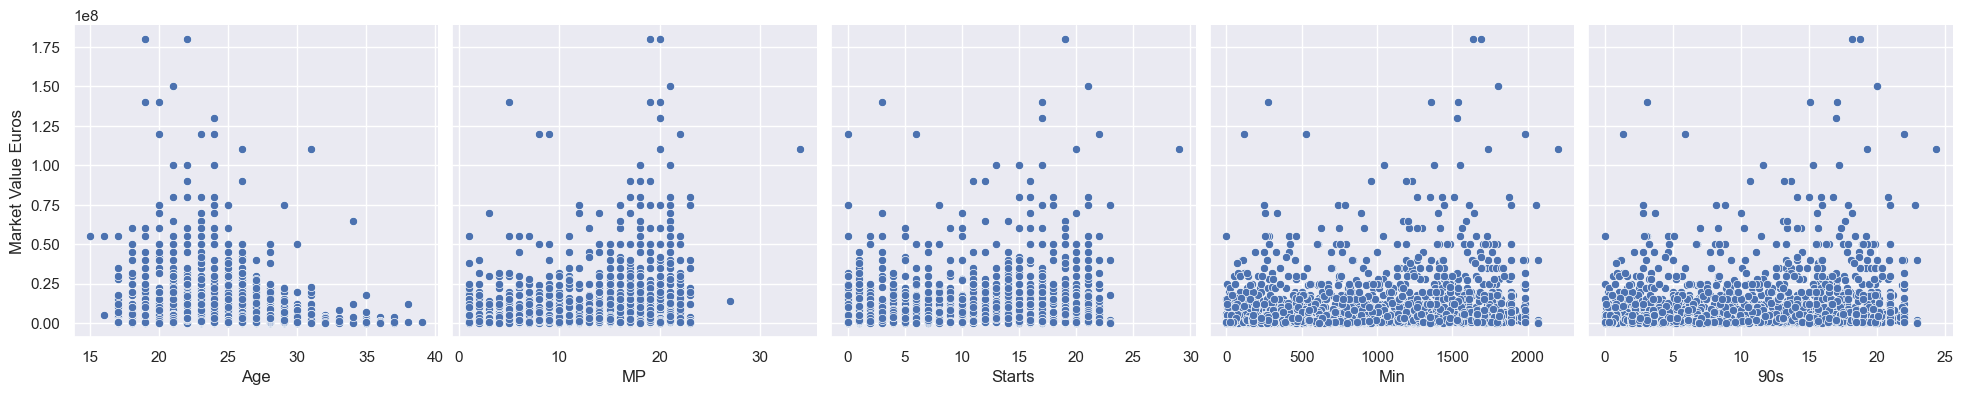

In [205]:
stats = sns.pairplot(data=player_grouped_stats,y_vars=['Market Value Euros'], x_vars=['Age', 'MP', 'Starts', 'Min', '90s'], height = 4)

c:\Users\Abdullah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

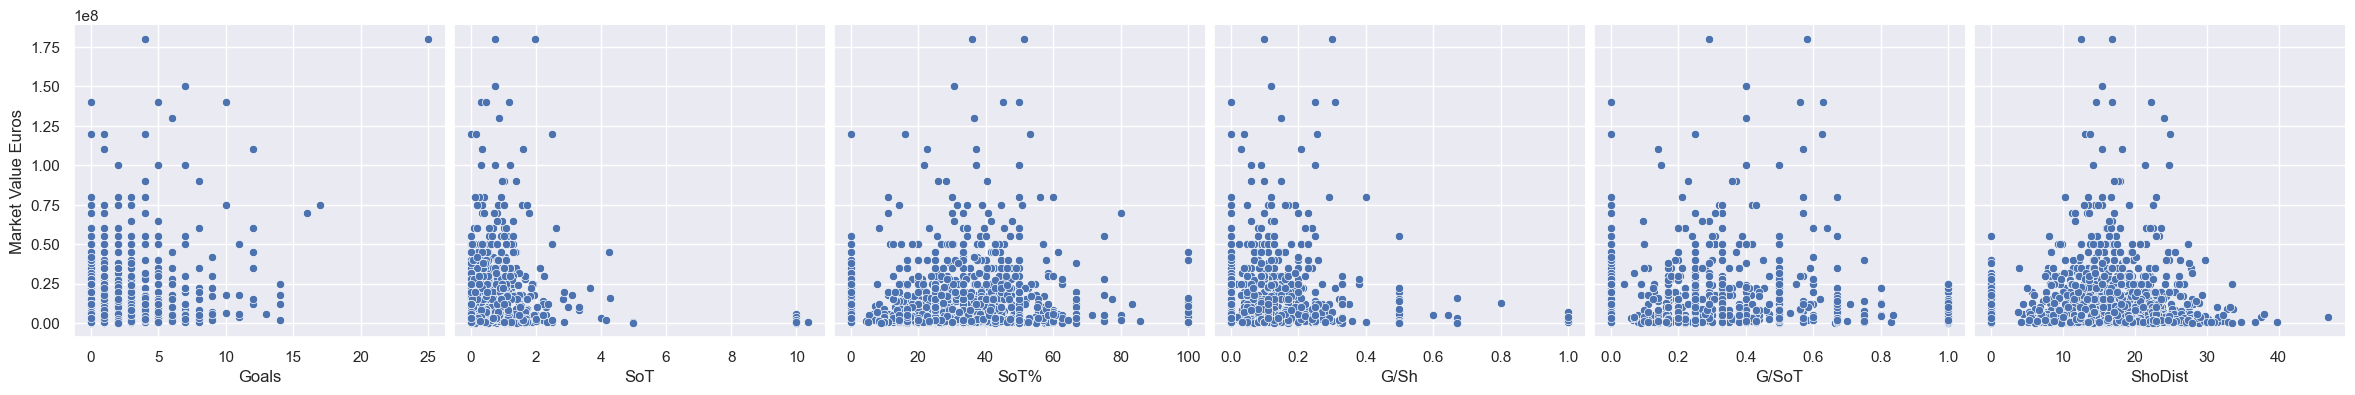

In [206]:
g = sns.pairplot(data=player_grouped_stats,y_vars=['Market Value Euros'], x_vars=['Goals', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist'], height = 4, palette = 'red')

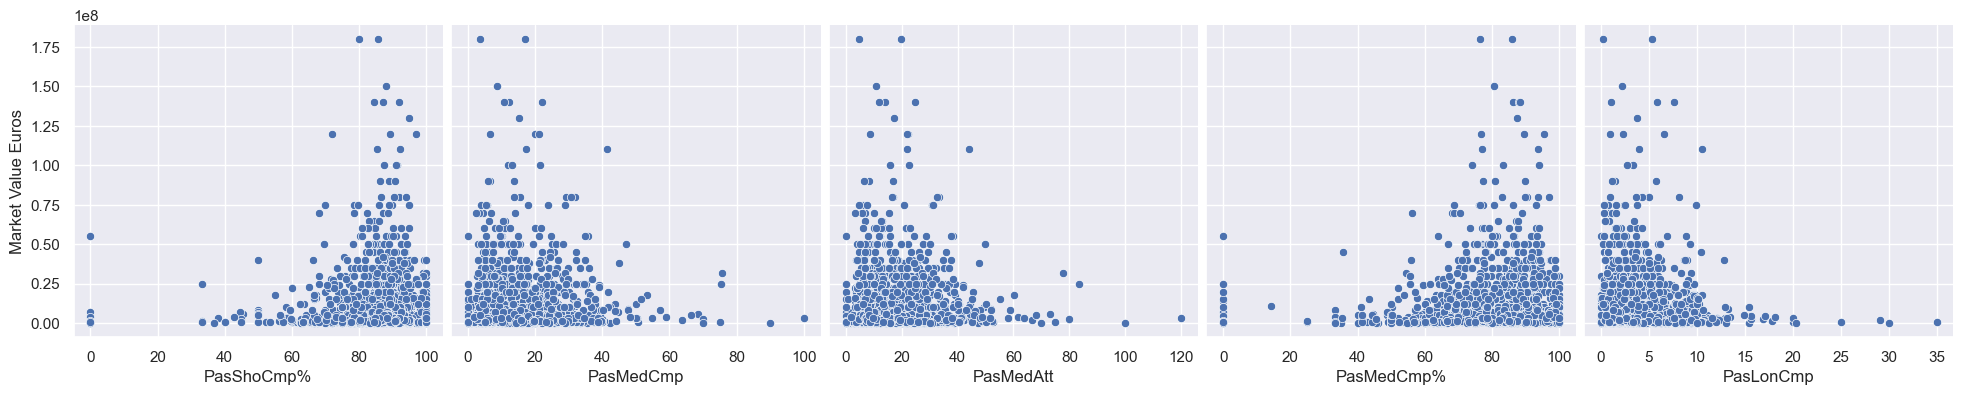

In [207]:
g = sns.pairplot(data=player_grouped_stats,y_vars=['Market Value Euros'],x_vars=['PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp'], height = 4)

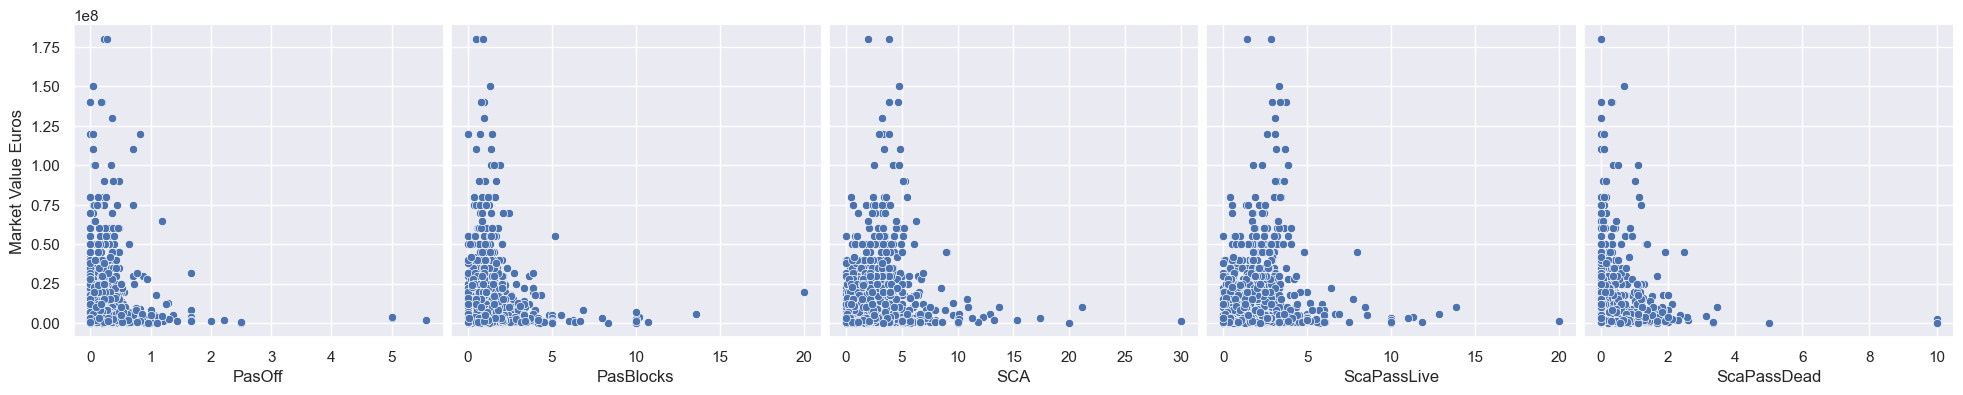

In [208]:
g = sns.pairplot(data= player_grouped_stats,y_vars=['Market Value Euros'],x_vars=['PasOff', 'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead'], height = 4)

##### 4.2 📊 Bar Plots: Market Value by Nation and Position

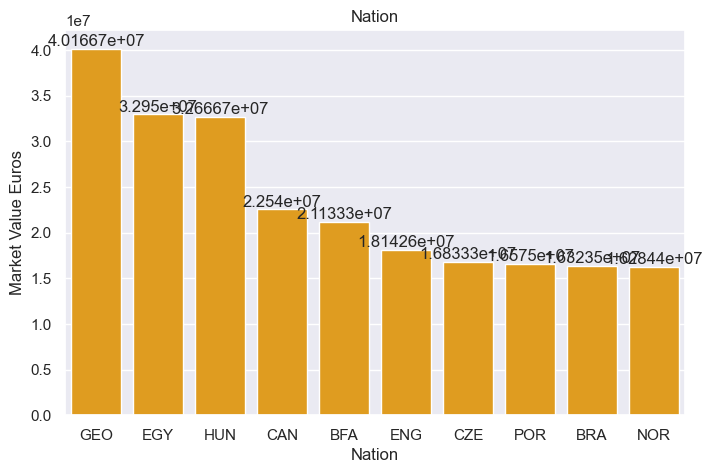

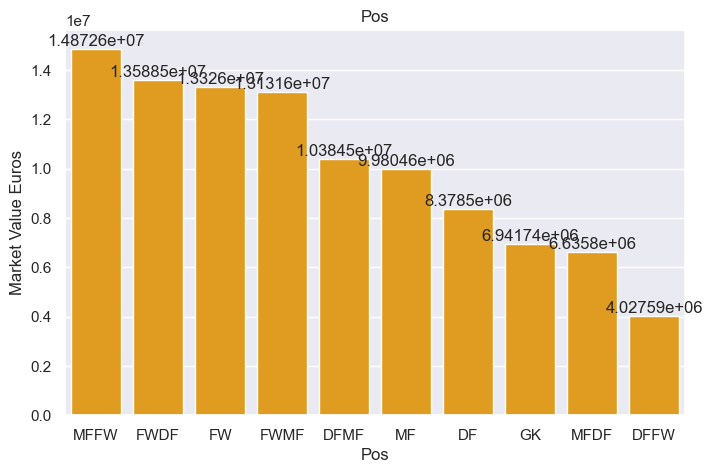

In [209]:
categories = ['Nation', 'Pos']
sns.set(rc={'figure.figsize': (8, 5)})

for c in categories:
    if c == 'Nation':
        # Top 10 nations by average market value
        top_nations = player_grouped_stats.groupby('Nation')['Market Value Euros'].mean().nlargest(10).index
        data = player_grouped_stats[player_grouped_stats['Nation'].isin(top_nations)]
        order = data.groupby('Nation')['Market Value Euros'].mean().sort_values(ascending=False).index
    else:
        data = player_grouped_stats
        order = data.groupby(c)['Market Value Euros'].mean().sort_values(ascending=False).index

    ax = sns.barplot(x=c, y="Market Value Euros", data=data, color='orange', order=order, errorbar=None)
    ax.bar_label(ax.containers[0])
    plt.title(c)
    plt.show()

##### 4.3 📈 Histogram Distributions of Key Metrics

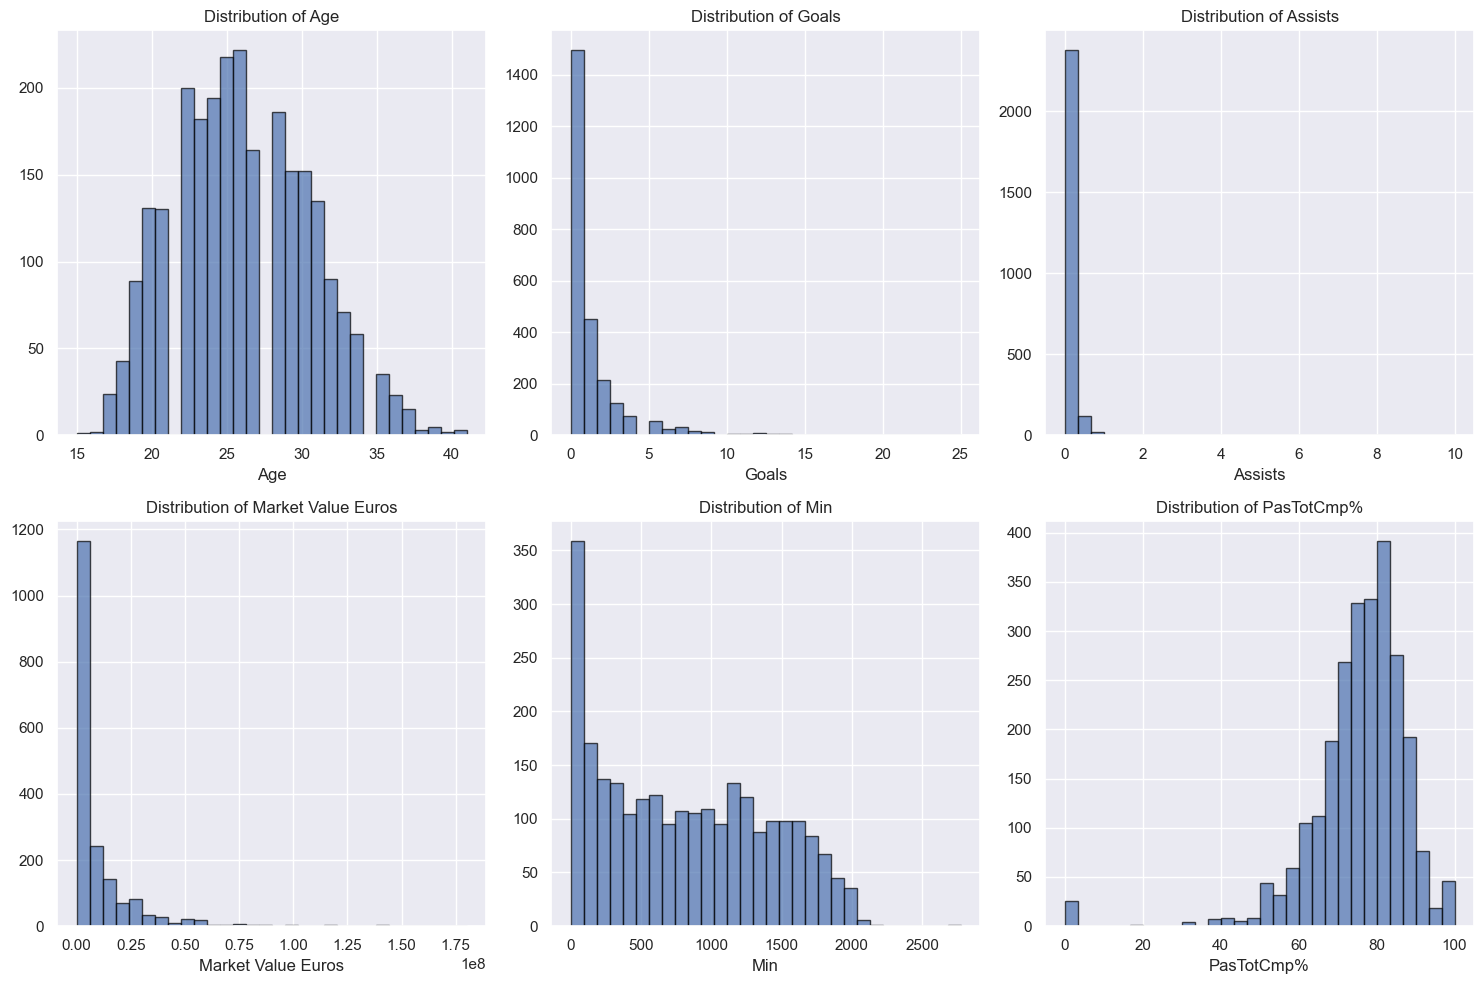

In [210]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

key_vars = ['Age', 'Goals', 'Assists', 'Market Value Euros', 'Min', 'PasTotCmp%']
for i, var in enumerate(key_vars):
    axes[i].hist(player_grouped_stats[var], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()

##### 4.4 📦 Boxplots by Position

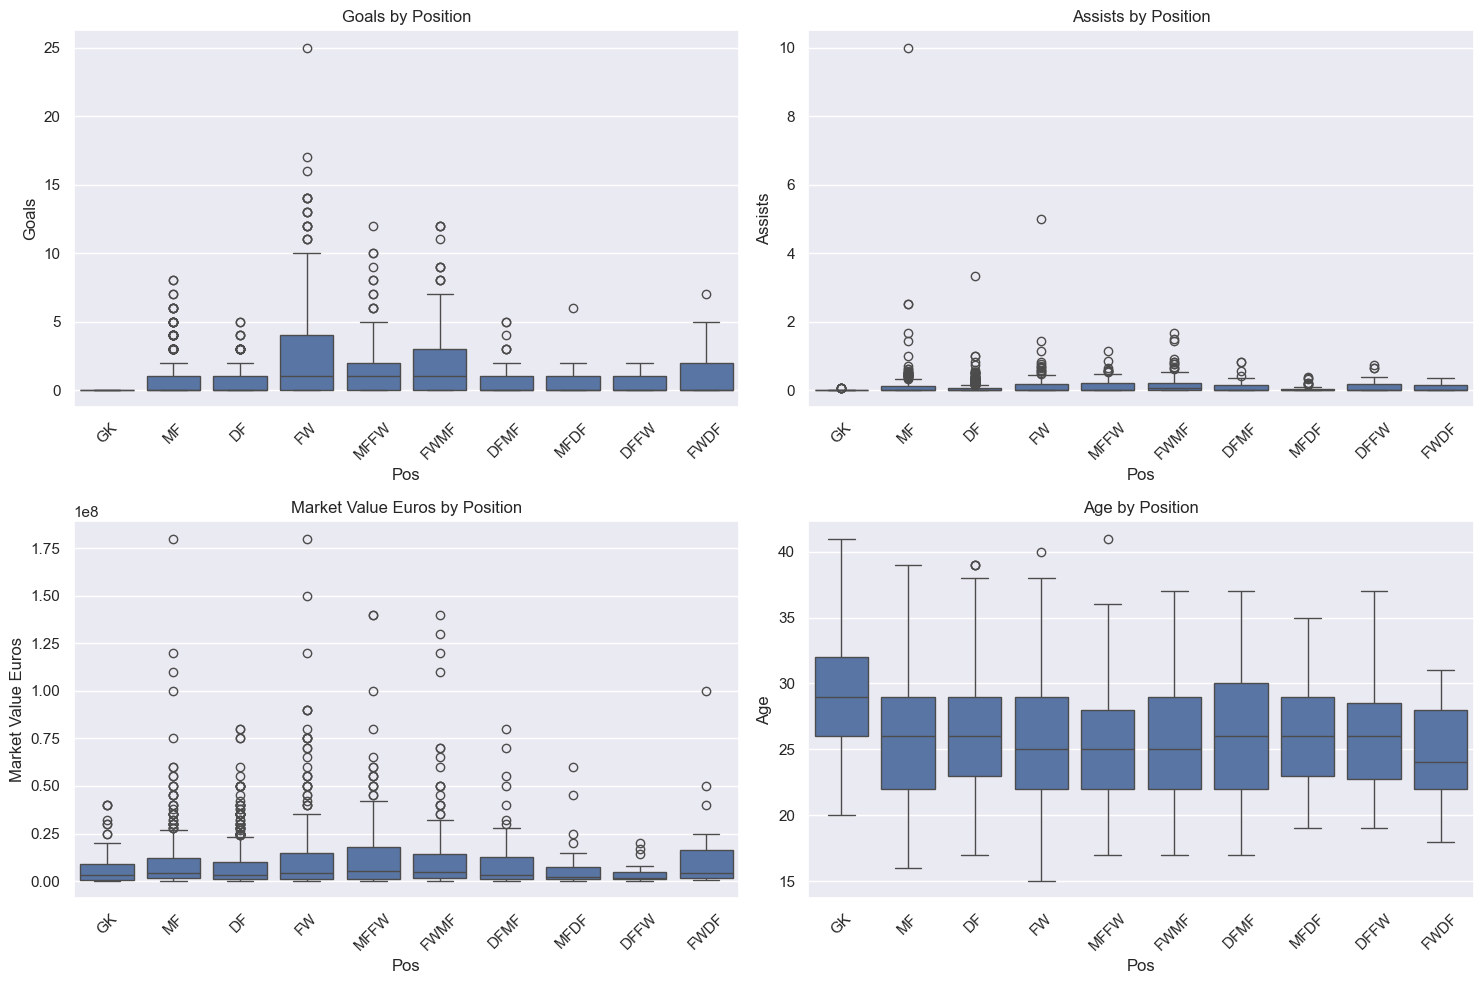

In [211]:
# Box plots to see distributions by position
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

metrics = ['Goals', 'Assists', 'Market Value Euros', 'Age']
for i, metric in enumerate(metrics):
    sns.boxplot(data=player_grouped_stats, x='Pos', y=metric, ax=axes[i])
    axes[i].set_title(f'{metric} by Position')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### 4.5 📉 Scatter Plots with Regression Lines

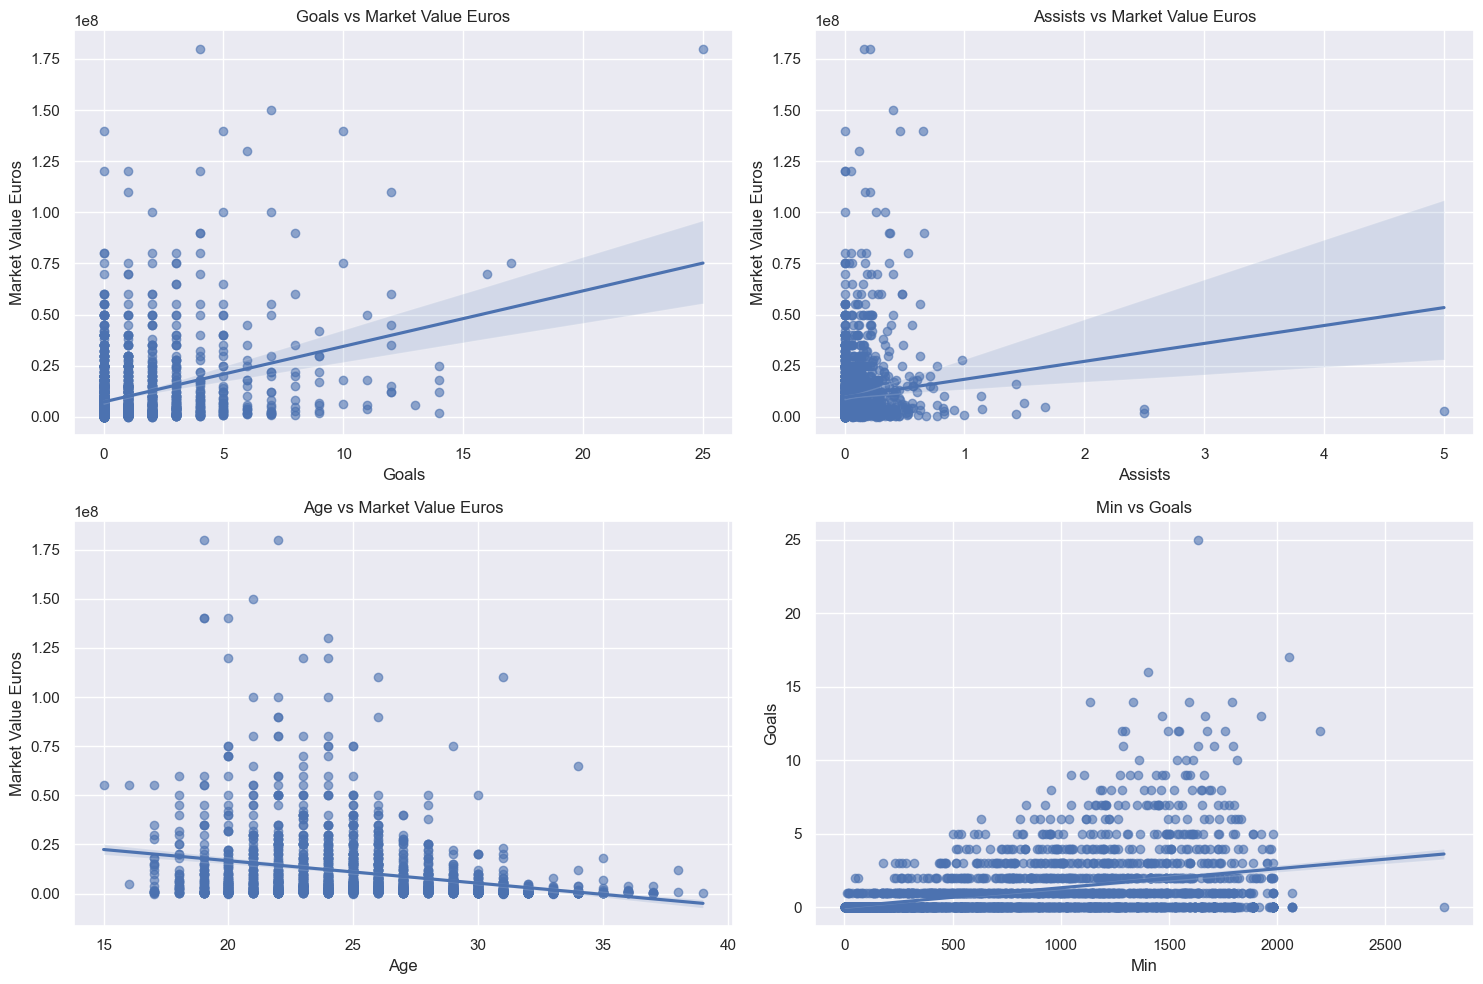

In [212]:
# Scatter plots with regression lines
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

pairs = [('Goals', 'Market Value Euros'), ('Assists', 'Market Value Euros'),
         ('Age', 'Market Value Euros'), ('Min', 'Goals')]

for i, (x, y) in enumerate(pairs):
    sns.regplot(data=player_grouped_stats, x=x, y=y, ax=axes[i], scatter_kws={'alpha':0.6})
    axes[i].set_title(f'{x} vs {y}')

plt.tight_layout()
plt.show()

##### 4.6 ⏳ Age-Based Analysis

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_13556\3162784037.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=player_grouped_stats, x='Pos', y='Age', ax=axes[0,0], palette='Set3')


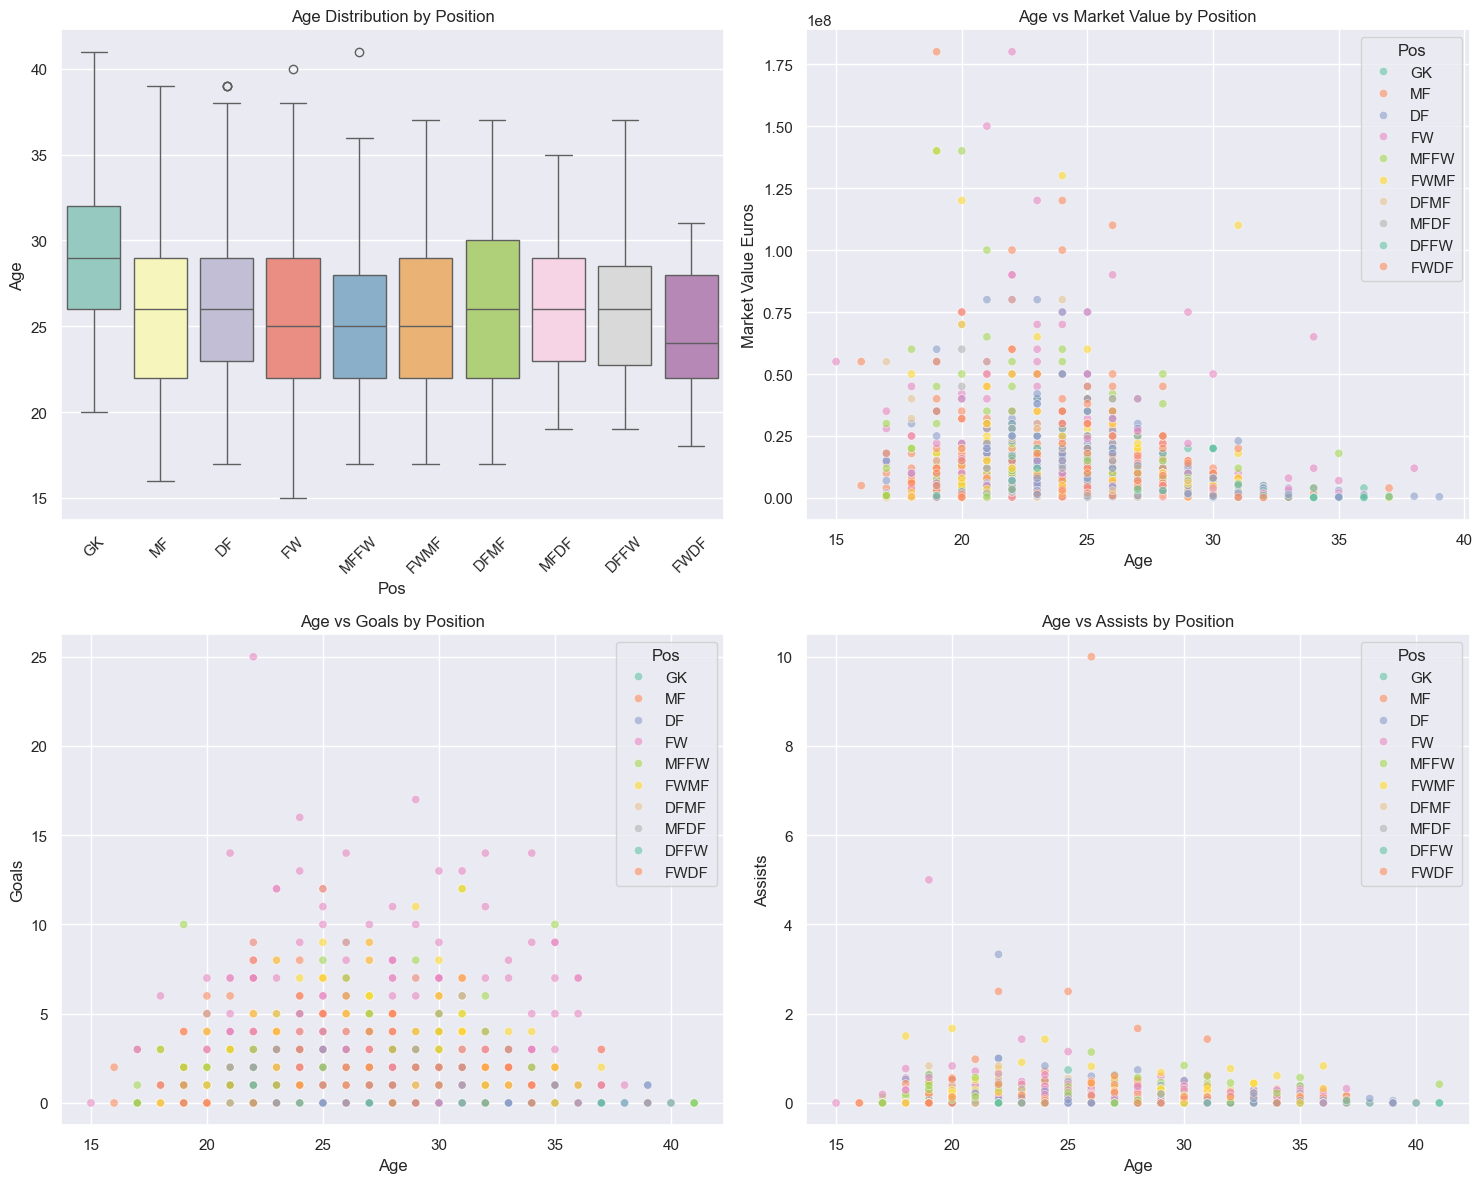

In [214]:
# Age analysis with performance metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age distribution by position
sns.boxplot(data=player_grouped_stats, x='Pos', y='Age', ax=axes[0,0], palette='Set3')
axes[0,0].set_title('Age Distribution by Position')
axes[0,0].tick_params(axis='x', rotation=45)

# Age vs Market Value with position coloring
sns.scatterplot(data=player_grouped_stats, x='Age', y='Market Value Euros', hue='Pos', 
                alpha=0.6, ax=axes[0,1], palette='Set2')
axes[0,1].set_title('Age vs Market Value by Position')

# Age vs Goals
sns.scatterplot(data=player_grouped_stats, x='Age', y='Goals', hue='Pos', 
                alpha=0.6, ax=axes[1,0], palette='Set2')
axes[1,0].set_title('Age vs Goals by Position')

# Age vs Assists
sns.scatterplot(data=player_grouped_stats, x='Age', y='Assists', hue='Pos', 
                alpha=0.6, ax=axes[1,1], palette='Set2')
axes[1,1].set_title('Age vs Assists by Position')

plt.tight_layout()
plt.show()

##### 4.7 📈 Performance Metrics vs Market Value

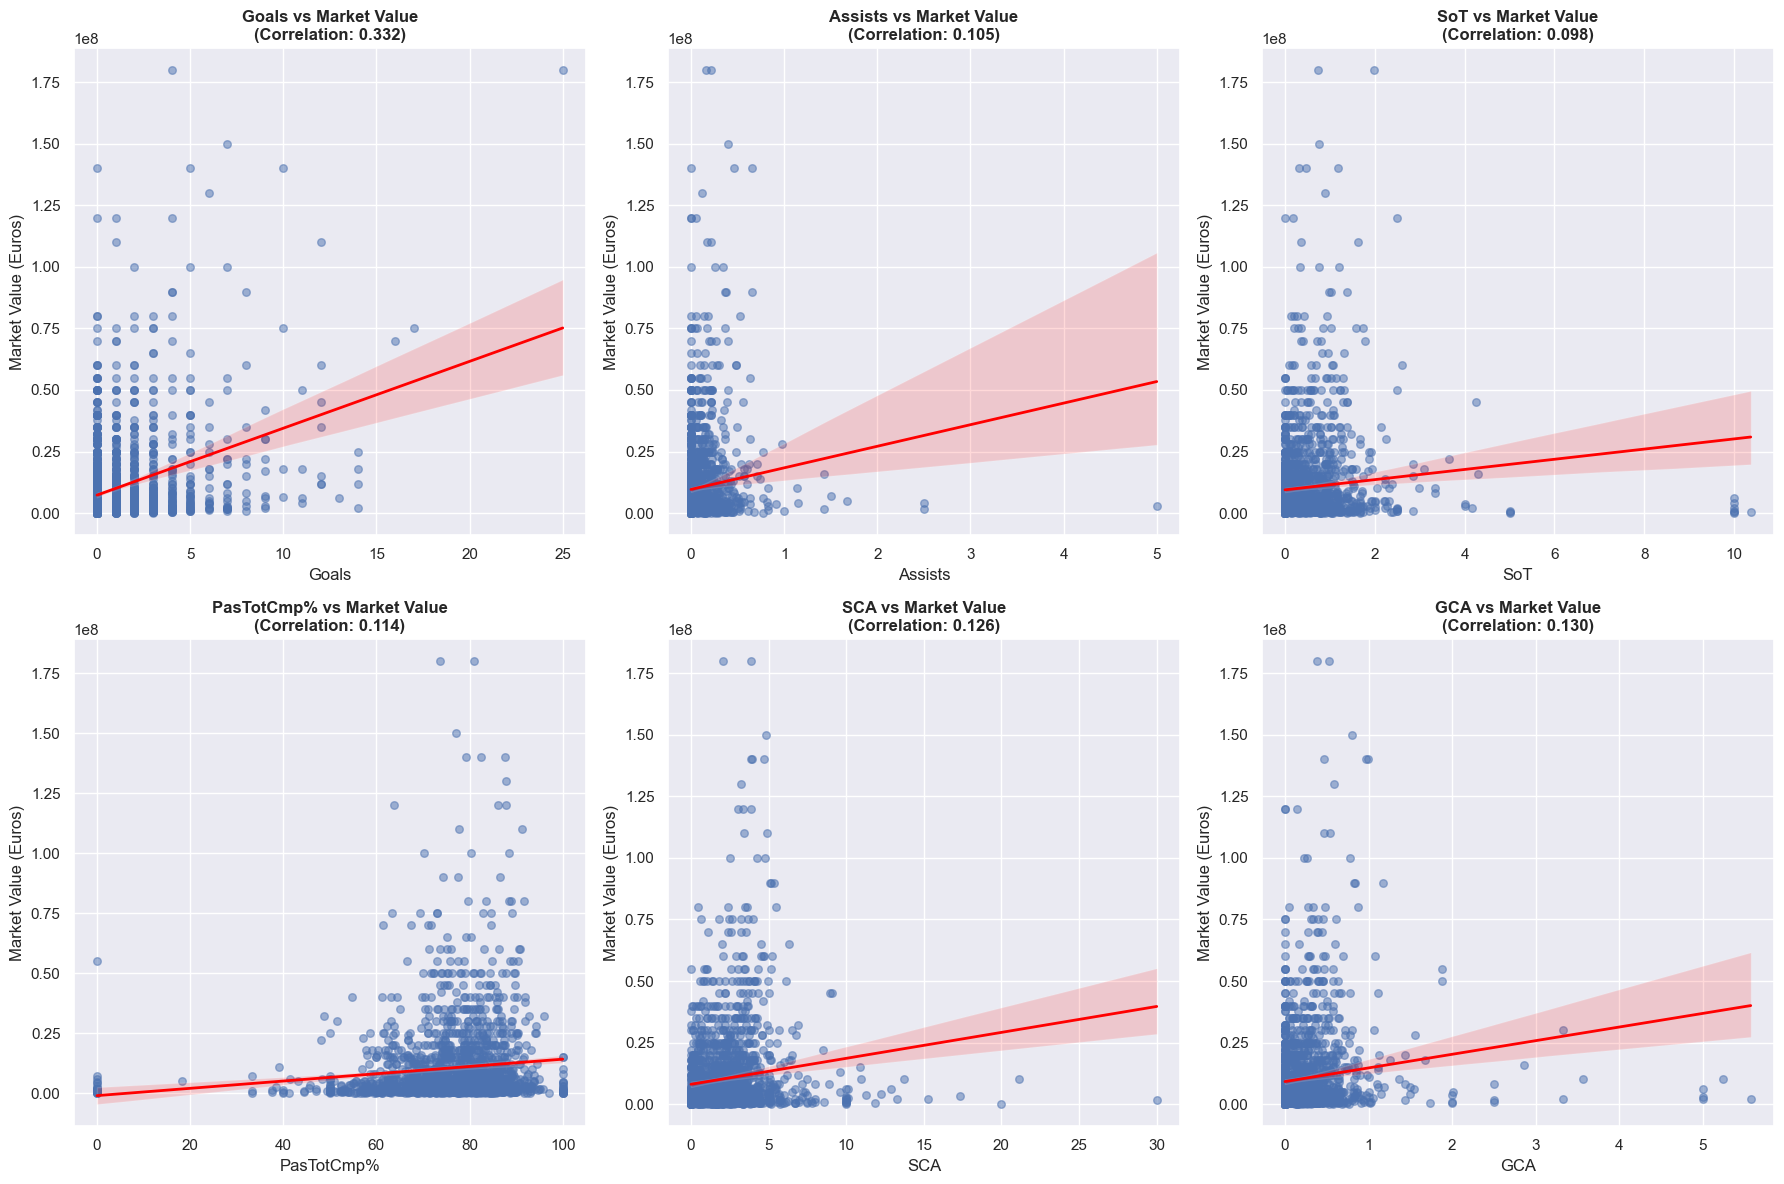

In [215]:
# Performance metrics vs Market Value
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Key performance metrics
performance_metrics = ['Goals', 'Assists', 'SoT', 'PasTotCmp%', 'SCA', 'GCA']

for i, metric in enumerate(performance_metrics):
    sns.regplot(data=player_grouped_stats, x=metric, y='Market Value Euros', 
                ax=axes[i], scatter_kws={'alpha':0.5, 's':30}, 
                line_kws={'color':'red', 'linewidth':2})
    
    # Calculate correlation
    corr = player_grouped_stats[metric].corr(player_grouped_stats['Market Value Euros'])
    axes[i].set_title(f'{metric} vs Market Value\n(Correlation: {corr:.3f})', fontweight='bold')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Market Value (Euros)')

plt.tight_layout()
plt.show()

##### 4.8 🏆 Top Performers Visuals

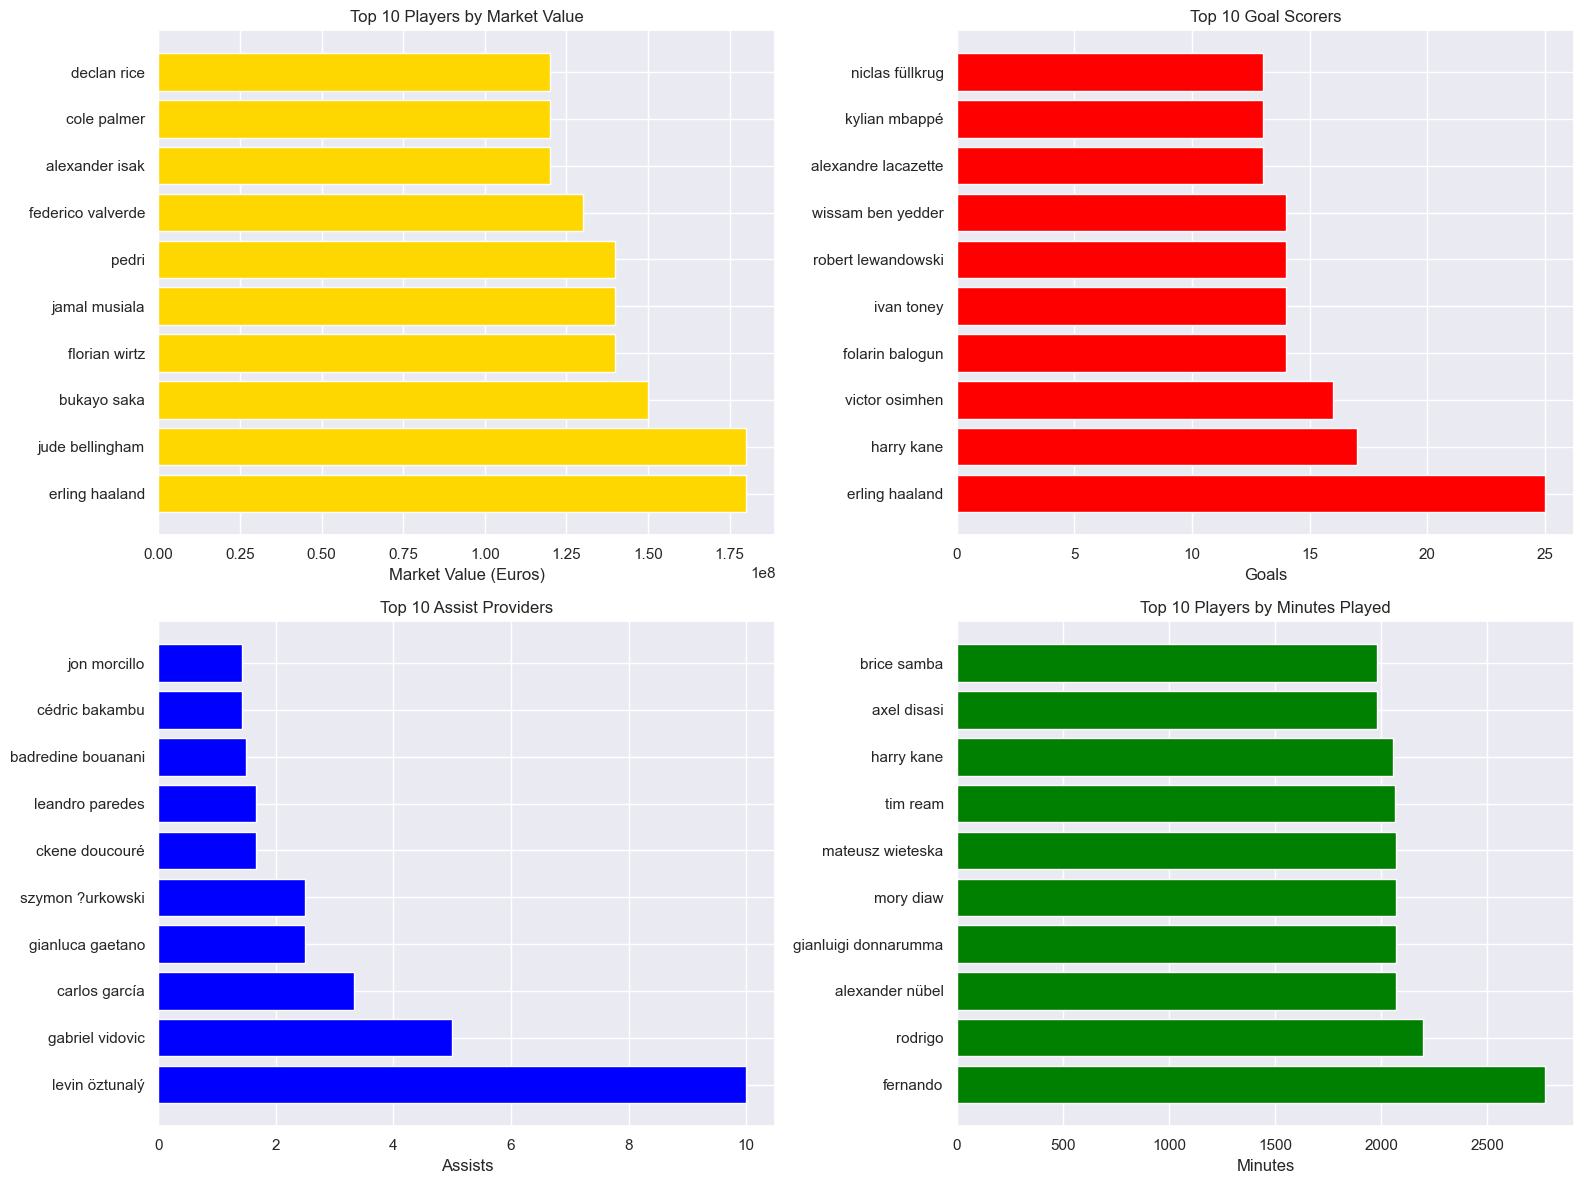

In [216]:
# Top performers analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 10 players by market value
top_10_value = player_grouped_stats.nlargest(10, 'Market Value Euros')
bars = axes[0,0].barh(top_10_value['Player'], top_10_value['Market Value Euros'], color='gold')
axes[0,0].set_title('Top 10 Players by Market Value')
axes[0,0].set_xlabel('Market Value (Euros)')

# Top 10 goal scorers
top_10_goals = player_grouped_stats.nlargest(10, 'Goals')
bars = axes[0,1].barh(top_10_goals['Player'], top_10_goals['Goals'], color='red')
axes[0,1].set_title('Top 10 Goal Scorers')
axes[0,1].set_xlabel('Goals')

# Top 10 assist providers
top_10_assists = player_grouped_stats.nlargest(10, 'Assists')
bars = axes[1,0].barh(top_10_assists['Player'], top_10_assists['Assists'], color='blue')
axes[1,0].set_title('Top 10 Assist Providers')
axes[1,0].set_xlabel('Assists')

# Top 10 by minutes played
top_10_minutes = player_grouped_stats.nlargest(10, 'Min')
bars = axes[1,1].barh(top_10_minutes['Player'], top_10_minutes['Min'], color='green')
axes[1,1].set_title('Top 10 Players by Minutes Played')
axes[1,1].set_xlabel('Minutes')

plt.tight_layout()
plt.show()

##### 4.9 📊 Feature Importance via Correlation

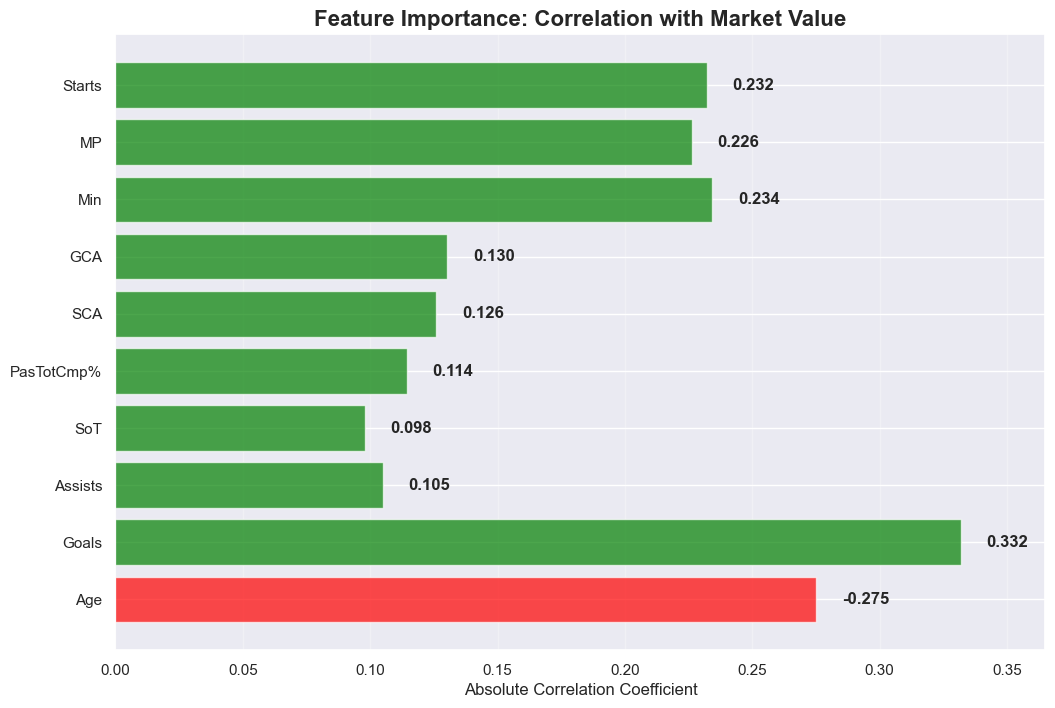

Feature correlations with Market Value:
Goals: 0.332
Age: -0.275
Min: 0.234
Starts: 0.232
MP: 0.226
GCA: 0.130
SCA: 0.126
PasTotCmp%: 0.114
Assists: 0.105
SoT: 0.098


In [217]:
key_features = ['Age', 'Goals', 'Assists', 'SoT', 'PasTotCmp%', 'SCA', 'GCA', 'Min', 'MP', 'Starts']
feature_importance = player_grouped_stats[key_features + ['Market Value Euros']].corr()['Market Value Euros'].drop('Market Value Euros')

# Create feature importance plot
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'green' for x in feature_importance.values]
bars = plt.barh(feature_importance.index, abs(feature_importance.values), color=colors, alpha=0.7)

# Add correlation values as text
for i, (bar, corr) in enumerate(zip(bars, feature_importance.values)):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{corr:.3f}', va='center', fontweight='bold')

plt.title('Feature Importance: Correlation with Market Value', fontsize=16, fontweight='bold')
plt.xlabel('Absolute Correlation Coefficient')
plt.xlim(0, max(abs(feature_importance.values)) * 1.1)
plt.grid(axis='x', alpha=0.3)
plt.show()

print("Feature correlations with Market Value:")
for feature, corr in feature_importance.sort_values(key=lambda x: abs(x), ascending=False).items():
    print(f"{feature}: {corr:.3f}")

##### 4.10 🧮 Position-wise Average Goals

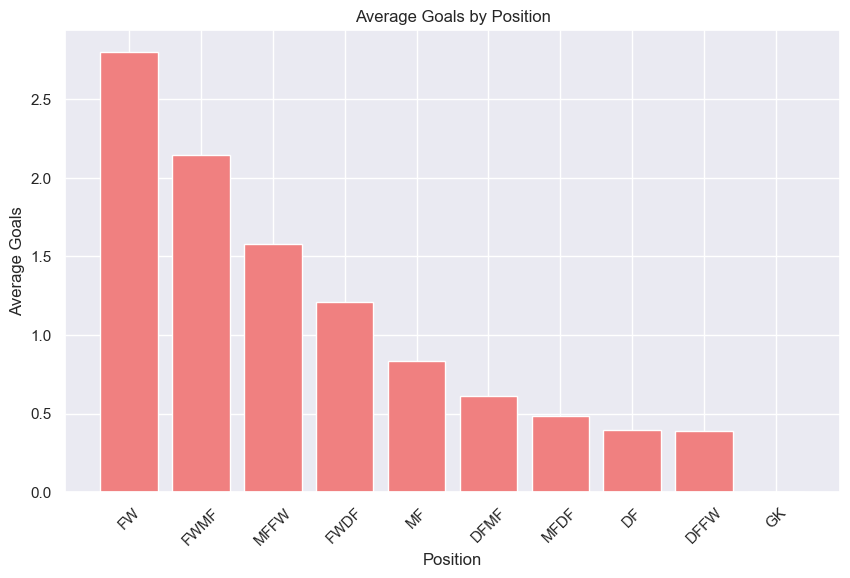

In [218]:
plt.figure(figsize=(10, 6))
avg_goals = player_grouped_stats.groupby('Pos')['Goals'].mean().sort_values(ascending=False)
plt.bar(avg_goals.index, avg_goals.values, color='lightcoral')
plt.title('Average Goals by Position')
plt.xlabel('Position')
plt.ylabel('Average Goals')
plt.xticks(rotation=45)
plt.show()

##### 4.11 🎯 Age vs Goals Scatter Plot

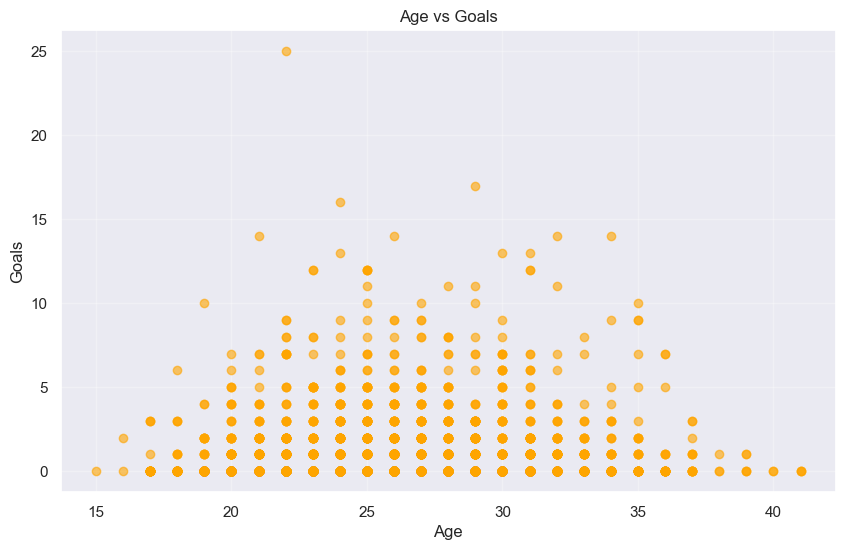

In [219]:
plt.figure(figsize=(10, 6))
plt.scatter(player_grouped_stats['Age'], player_grouped_stats['Goals'], alpha=0.6, color='orange')
plt.title('Age vs Goals')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.grid(True, alpha=0.3)
plt.show()

##### 4.12 🏗️ Correlations with Heatmap

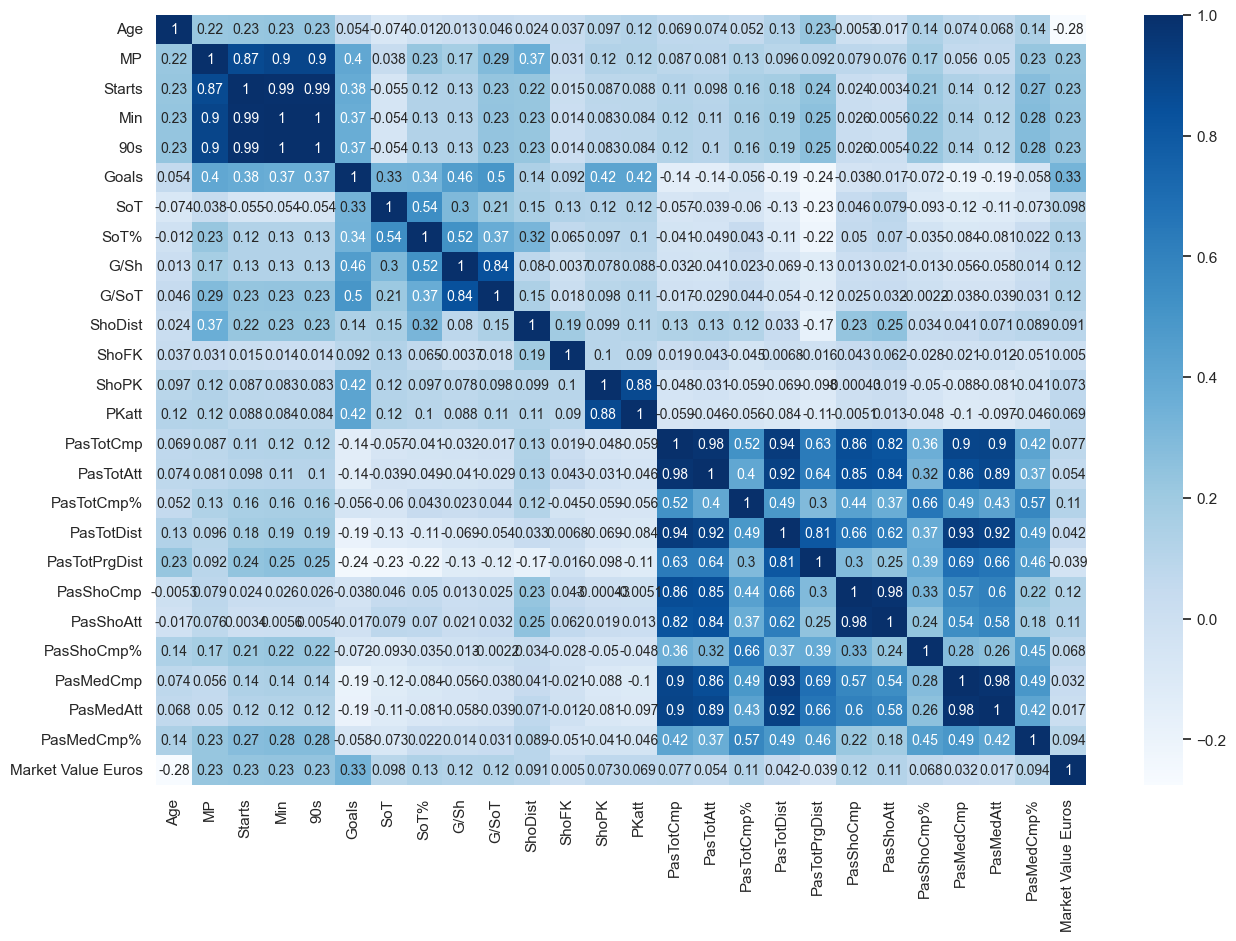

In [222]:
sns.set(rc={'figure.figsize':(15,10)})

# n_variables[:25]
n_variables = ['Age', 'MP', 'Starts', 'Min', '90s', 'Goals', 'SoT', 'SoT%', 'G/Sh',
       'G/SoT', 'ShoDist', 'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt',
       'PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt',
       'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'Market Value Euros']

pc = player_grouped_stats[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

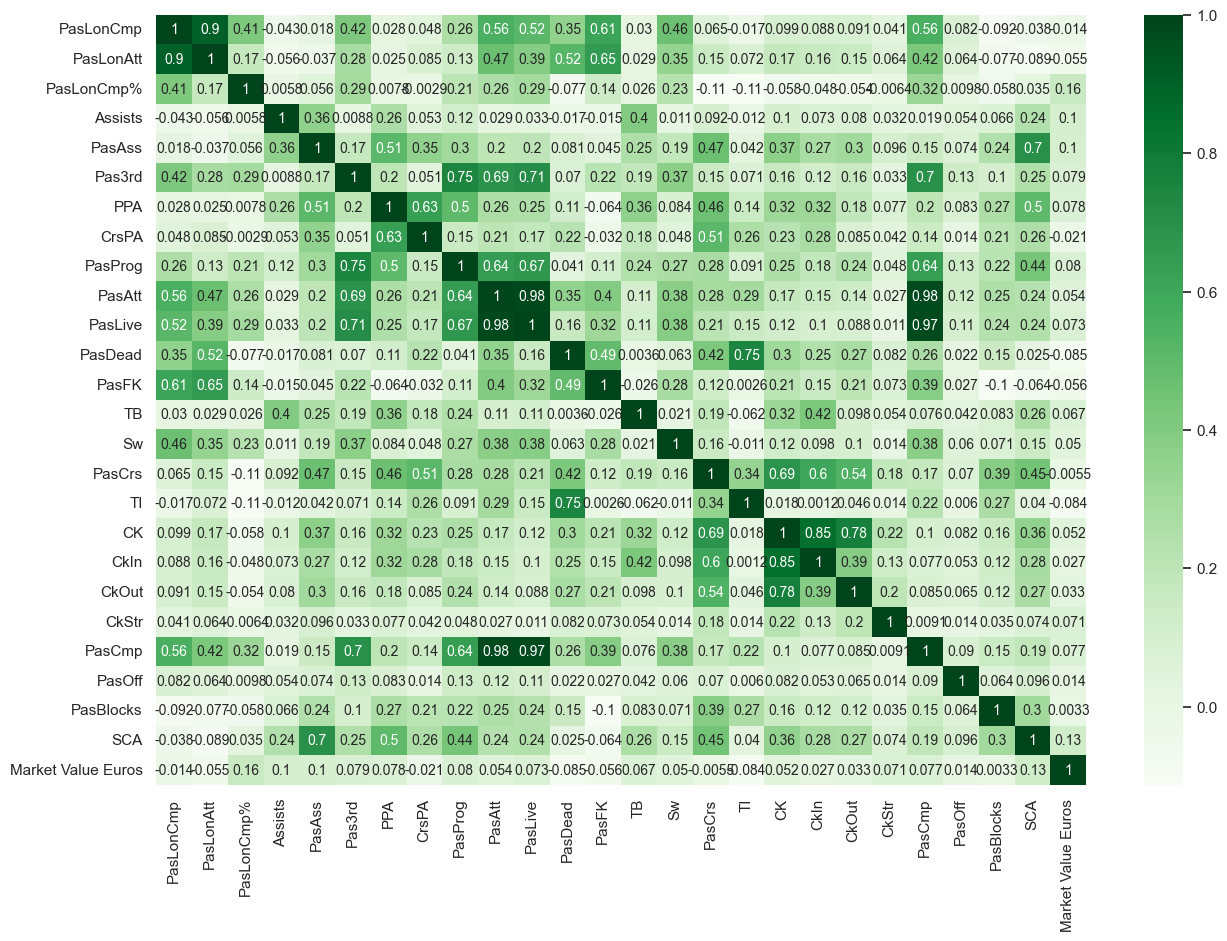

In [223]:
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

# n_variables[25:50]
n_variables1 = ['PasLonCmp', 'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd',
       'PPA', 'CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK',
       'TB', 'Sw', 'PasCrs', 'TI', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasCmp',
       'PasOff', 'PasBlocks', 'SCA', 'Market Value Euros']

pc = player_grouped_stats[n_variables1].corr(method ='pearson')

cols = n_variables1

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Greens")

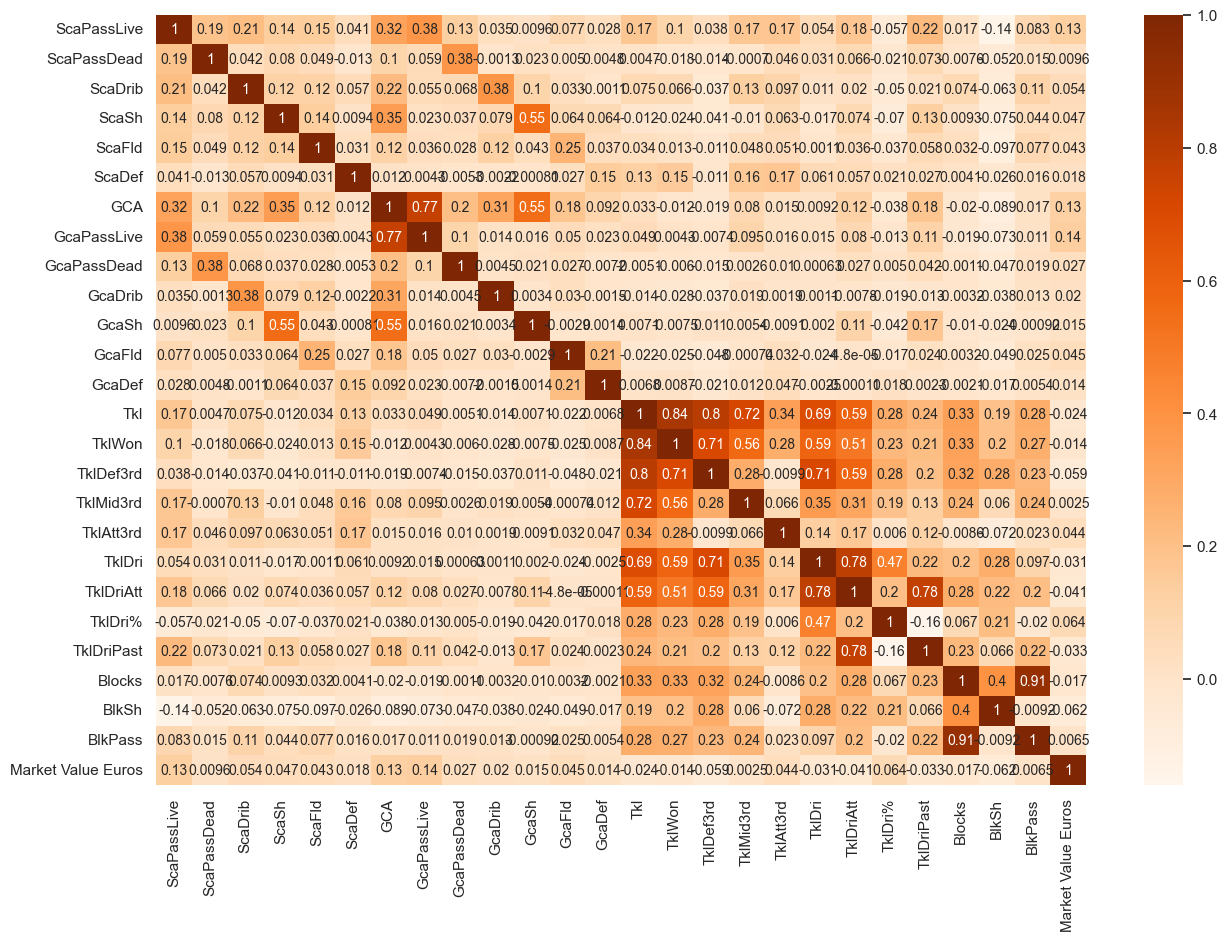

In [224]:
sns.set(rc={'figure.figsize':(15,10)})

# n_variables[50:75]
n_variables2 = ['ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef',
       'GCA', 'GcaPassLive', 'GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld',
       'GcaDef', 'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd',
       'TklDri', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'Blocks', 'BlkSh',
       'BlkPass', 'Market Value Euros']

pc = player_grouped_stats[n_variables2].corr(method ='pearson')

cols = n_variables2

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Oranges")

#### 5. Train Model and Evaluate Result

##### 5.1 🧾 Data Prep for Modeling

In [16]:
new_stats = player_grouped_stats.copy()

# Drop rows with NaN in the target only
new_stats = new_stats.dropna(subset=['Market Value Euros'])

new_stats.head()

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Goals,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,OG,Recov,AerWon,AerLost,Market Value Euros
0,?ukasz fabia?ski,POL,GK,West Ham,Premier League,37,22,22,1873,20.8,0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,17.9,27.3,65.6,556.4,435.7,3.7,3.70,100.0,6.68,6.73,99.3,7.40,16.60,44.6,0.00,0.00,0.38,0.00,0.00,0.00,27.3,18.1,9.04,2.45,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,17.9,0.14,0.00,0.10,0.00,0.1,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.00,29.3,25.80,29.2,0.10,0.0,0.00,29.3,0.00,0.00,0.0,0.00,0.0,15.4,101.5,68.5,0.00,0.00,0.00,0.05,0.00,10.8,0.00,0.00,0.0,0.0,0.00,0.14,0.00,0.00,0.00,0.0,0.0,0.48,0.48,0.05,500000.0
1,?ukasz por?ba,POL,MF,Lens,Ligue 1,22,7,3,247,2.7,0,0.00,0.0,0.0,0.0,17.1,0.00,0.0,0.0,40.0,48.5,82.4,633.0,187.0,18.1,21.50,84.5,16.30,18.90,86.3,2.96,4.44,66.7,0.37,1.85,4.44,1.85,0.74,6.67,48.5,48.1,0.37,0.37,0.00,0.00,2.22,0.00,0.00,0.00,0.00,0.00,40.0,0.00,0.37,3.33,2.96,0.0,0.0,0.00,0.00,0.37,0.74,0.37,0.0,0.0,0.0,0.0,0.37,1.85,1.48,0.74,0.37,0.74,0.74,1.11,66.7,0.37,1.11,0.00,1.11,1.11,2.96,0.74,0.00,57.8,1.11,6.3,30.70,20.7,0.37,57.8,0.74,0.37,50.0,0.37,50.0,43.0,213.7,76.3,1.11,2.96,0.00,1.85,0.37,40.7,6.67,0.37,0.0,0.0,2.96,0.74,0.00,2.22,1.48,0.0,0.0,4.07,0.74,0.37,1000000.0
2,?ukasz skorupski,POL,GK,Bologna,Serie A,31,21,21,1890,21.0,0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,26.4,34.2,77.1,706.6,494.6,4.9,4.95,99.0,11.60,11.80,98.4,8.62,16.10,53.6,0.00,0.00,0.00,0.00,0.00,0.00,34.2,24.0,10.10,2.86,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,26.4,0.14,0.00,0.10,0.00,0.1,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.05,0.05,0.05,0.00,0.00,0.05,0.05,100.0,0.00,0.00,0.00,0.00,0.00,0.05,0.62,0.05,36.8,33.00,36.6,0.19,0.0,0.00,36.8,0.00,0.00,0.0,0.00,0.0,19.3,99.3,67.7,0.00,0.00,0.00,0.05,0.00,15.6,0.00,0.14,0.0,0.0,0.00,0.24,0.00,0.00,0.05,0.0,0.0,1.14,0.19,0.00,2500000.0
4,aaron cresswell,ENG,DF,West Ham,Premier League,33,18,17,1533,17.0,0,0.06,14.3,0.0,0.0,22.8,0.18,0.0,0.0,50.8,63.9,79.6,819.1,377.8,28.6,30.50,93.8,17.40,21.70,80.2,4.24,8.47,50.0,0.00,1.76,4.41,1.41,0.76,6.94,63.9,51.6,12.20,1.76,0.06,0.24,5.94,8.24,2.18,0.12,1.71,0.06,50.8,0.12,1.47,3.12,2.06,1.0,0.0,0.00,0.06,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.82,0.41,0.47,0.35,0.00,0.35,0.94,37.5,0.59,1.00,0.47,0.53,1.18,2.00,2.35,0.00,70.8,3.71,21.8,30.40,18.9,0.47,70.8,0.35,0.12,33.3,0.18,50.0,33.5,151.6,74.4,1.59,1.24,0.06,0.24,0.35,43.3,4.06,0.12,0.0,0.0,0.47,0.29,0.06,5.94,0.41,0.0,0.0,4.71,1.41,1.18,500000.0
5,aaron hickey,SCO,DF,Brentford,Premier League,20,10,9,739,8.2,0,0.12,25.0,0.0,0.0,21.0,0.00,0.0,0.0,31.2,38.5,81.0,452.9,134.3,19.1,21.20,90.2,10.10,12.30,82.2,1.22,3.05,40.0,0.00,0.12,3.05,0.61,0.12,3.90,38.5,34.4,4.15,0.73,0.00,0.12,1.59,3.41,0.00,0.00,0.00,0.00,31.2,0.00,0.85,0.85,0.61,0.0,0.0,0.12,0.12,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,2.32,1.71,1.34,0.98,0.00,0.98,1.95,50.0,0.98,1.22,0.49,0.73,1.34,3.66,1.34,0.00,49.3,2.68,12.9,25.90,11.0,1.10,49.3,3.05,0.85,28.0,1.34,44.0,30.2,160.6,98.7,2.68,0.85,0.00,0.85,0.49,30.7,3.05,0.49,0.0,0.0,0.85,2.07,0.00,1.59,1.71,0.0,0.0,4.39,0.49,0.73,10000000.0


##### 5.2 Baseline Methodology

In [27]:
# True target values
y_true = new_stats["Market Value Euros"]

# Predicted values using mean market value per position
baseline_pred = new_stats.groupby("Pos")["Market Value Euros"].transform("mean")

# Evaluation metrics for baseline model
baseline_r2 = r2_score(y_true, baseline_pred)
baseline_mse = mean_squared_error(y_true, baseline_pred)
baseline_mae = mean_absolute_error(y_true, baseline_pred)

# Print results
print("📊 Baseline Result:")
print(f"R² Score: {baseline_r2:.4f}")
print(f"Mean Squared Error (MSE): {baseline_mse:.2f}")
print(f"Mean Absolute Error (MAE): {baseline_mae:.2f}")

📊 Baseline Result:
R² Score: 0.0218
Mean Squared Error (MSE): 300439157428262.56
Mean Absolute Error (MAE): 10601162.80


#### 🔁 5.2 XGBoosting Implementation

##### 5.2.1 🚀 Before Hyperparameter Tuning (Basic Model)

In [28]:
# ➤ Selecting basic features
features = ['Goals', 'Age', 'Min', 'Starts', 'MP']
X = new_stats[features]

# ➤ Applying log transformation to target for stability
y = np.log1p(new_stats['Market Value Euros'])  

# ➤ Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ➤ Initializing and fitting XGBoost model
xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# ➤ Predicting test values
y_pred_xgb_basic = xgb.predict(X_test)

# ➤ Evaluation metrics
print("📉 Basic XGBoost Model Performance:")
print("R² (test):", r2_score(y_test, y_pred_xgb_basic))
print("MSE (test):", mean_squared_error(np.expm1(y_test), np.expm1(y_pred_xgb_basic)))
print("MAE (test):", mean_absolute_error(np.expm1(y_test), np.expm1(y_pred_xgb_basic))) 

📉 Basic XGBoost Model Performance:
R² (test): 0.3289061220167342
MSE (test): 246045345313449.3
MAE (test): 7933113.2362753395


##### 🔁 5.2.2 XGBoost With K-Fold (Before Hyperparameter Tuning)

In [242]:
# ➤ Define basic features used before HPO
features = ['Goals', 'Age', 'Min', 'Starts', 'MP']
X = new_stats[features]
y = np.log1p(new_stats['Market Value Euros'])

# ➤ Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
mae_scores = []
mse_scores = []

print("🔁 Starting K-Fold CV for XGBoost (Before HPO):\n")

# ➤ Loop over folds
for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # ➤ Default XGBoost model (before tuning)
    model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ➤ Inverse transform target values
    y_test_exp = np.expm1(y_test)
    y_pred_exp = np.expm1(y_pred)

    # ➤ Metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test_exp, y_pred_exp)
    mae = mean_absolute_error(y_test_exp, y_pred_exp)

    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)

    print(f"Fold {fold}: R² = {r2:.4f}, MSE = {mse:.2f}, MAE = {mae:.2f}")

# ➤ Average metrics
print("\n📊 Average Cross-Validation Results (Before HPO):")
print(f"Mean R²: {np.mean(r2_scores):.4f}")
print(f"Mean MSE: {np.mean(mse_scores):.2f}")
print(f"Mean MAE: {np.mean(mae_scores):.2f}")


🔁 Starting K-Fold CV for XGBoost (Before HPO):

Fold 1: R² = 0.3289, MSE = 246045345313449.31, MAE = 7933113.24
Fold 2: R² = 0.3094, MSE = 217815572419824.12, MAE = 7565248.84
Fold 3: R² = 0.3879, MSE = 298045715099269.94, MAE = 7780953.80
Fold 4: R² = 0.3141, MSE = 306302885130364.00, MAE = 8826738.10
Fold 5: R² = 0.3829, MSE = 234558665888007.97, MAE = 6933044.70

📊 Average Cross-Validation Results (Before HPO):
Mean R²: 0.3446
Mean MSE: 260553636770183.06
Mean MAE: 7807819.74


##### 5.2.3 ⚙️ After Hyperparameter Tuning & Feature Engineering

In [235]:
# ➤ Expanded feature set including more stats and engineered features
features = [
    'Goals', 'Assists', 'SoT', 'PasTotCmp%', 'SCA', 'GCA', 'Min', 'MP', 'Starts', 'Age',
    'PasTotAtt', 'PasTotCmp', 'PasTotDist', 'PasTotPrgDist', 'Tkl', 'Int', 'Blocks', 'CrdY', 'CrdR'
]

# ➤ Feature Engineering
new_stats['Goals_per_90'] = new_stats['Goals'] / (new_stats['Min'] / 90 + 1e-6)
new_stats['Assists_per_90'] = new_stats['Assists'] / (new_stats['Min'] / 90 + 1e-6)
new_stats['Age_squared'] = new_stats['Age'] ** 2
new_stats['Goal_Contrib_per_90'] = (new_stats['Goals'] + new_stats['Assists']) / (new_stats['Min'] / 90 + 1e-6)

# ➤ Adding new engineered features to list
features += ['Goals_per_90', 'Assists_per_90', 'Age_squared', 'Goal_Contrib_per_90']

In [236]:
# ➤ Feature matrix and target with log transformation
X = new_stats[features]
y = np.log1p(new_stats['Market Value Euros'])  

# ➤ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ➤ Training improved XGBoost model
xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# ➤ Predictions and evaluation
y_pred_feature = xgb.predict(X_test)
print("📊 Improved XGBoost Model with Engineered Features:")
print("R² (test):", r2_score(y_test, y_pred_feature))
print("MSE (test):", mean_squared_error(np.expm1(y_test), np.expm1(y_pred_feature)))
print("MAE (test):", mean_absolute_error(np.expm1(y_test), np.expm1(y_pred_feature)))

📊 Improved XGBoost Model with Engineered Features:
R² (test): 0.4040239403189778
MSE (test): 229975981321620.47
MAE (test): 7336042.589738178


##### 5.2.4 📌 Feature Importance Visualization

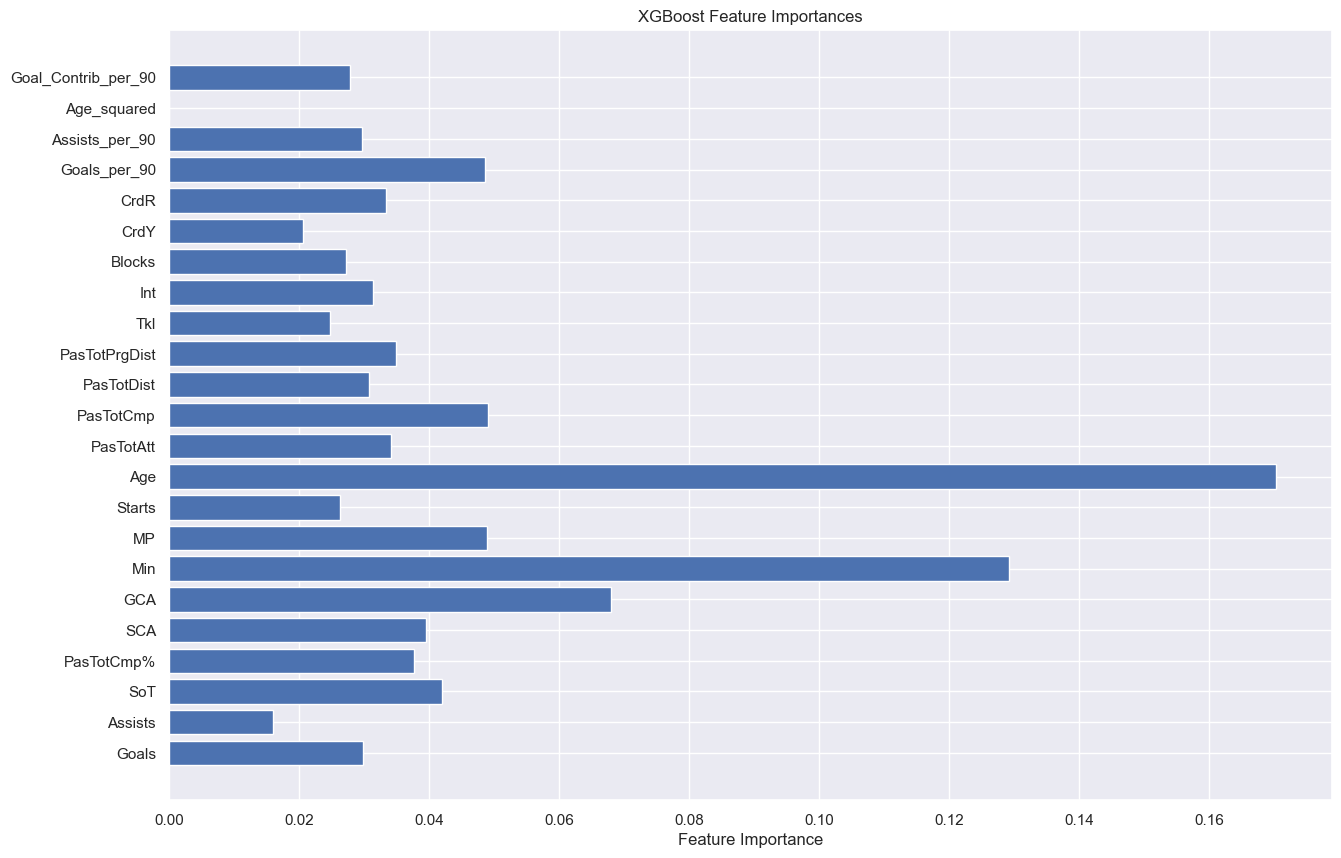

In [237]:
# ➤ Visualize which features contribute most
importances = xgb.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importances")
plt.show()

##### 5.2.5 🛠️ Hyperparameter Tuning with GridSearchCV

In [238]:
# ➤ Grid search for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# ➤ Using R² as scoring metric
grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# ➤ Best parameters and R² from cross-validation
print("✅ Best R²:", grid.best_score_)
print("✅ Best params:", grid.best_params_)

✅ Best R²: 0.43139857058722003
✅ Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


##### 5.2.6 📉 Evaluation on Test Set After Tuning

In [240]:
# ➤ Predictions using best model
y_pred_hyper_xgb = grid.predict(X_test)

# ➤ Evaluation metrics
print("📈 Tuned XGBoost Model Performance on Test Set:")
print("R² (test):", r2_score(y_test, y_pred_hyper_xgb))
print("MSE (test):", mean_squared_error(np.expm1(y_test), np.expm1(y_pred_hyper_xgb)))
print("MAE (test):", mean_absolute_error(np.expm1(y_test), np.expm1(y_pred_hyper_xgb)))

📈 Tuned XGBoost Model Performance on Test Set:
R² (test): 0.425000223582773
MSE (test): 238891062491804.62
MAE (test): 7541890.845016893


##### 5.2.7 📷 Actual vs Predicted Plot

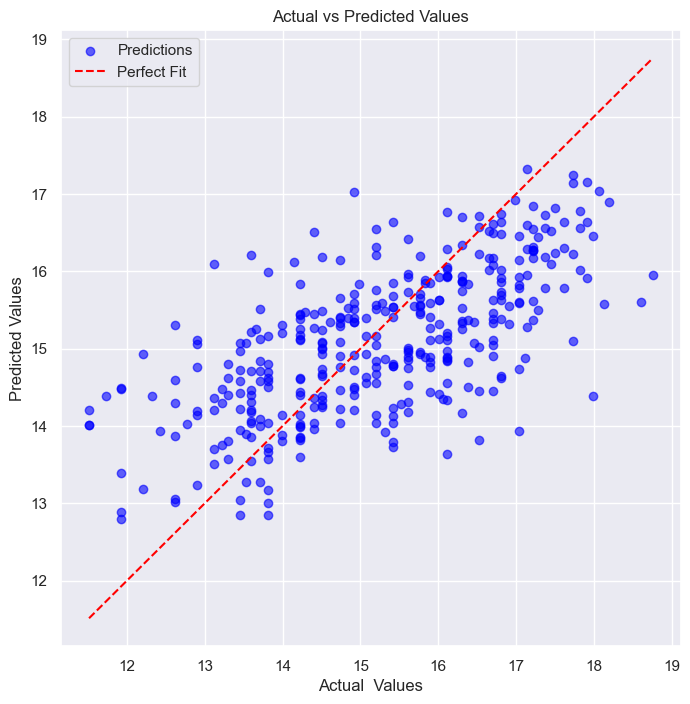

In [241]:
# ➤ Scatter plot comparing actual vs predicted log values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_hyper_xgb, alpha=0.6, color='blue', label='Predictions')

# ➤ Reference line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel("Actual  Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

#### 5.3 Neural Network Implementation

##### 5.3.1 Feature Selection & Preprocessing Based on Correlation with Market Value

In [18]:
# Drop non-numeric ID columns
non_numeric = ['Player', 'Nation', 'Pos', 'Squad', 'Comp']
player_cleaned = player_grouped_stats.drop(columns=[col for col in non_numeric if col in player_grouped_stats.columns])

# Drop any remaining NaNs (if any)
player_cleaned = player_cleaned.dropna()

# Correlation with target
correlation = player_cleaned.corr(numeric_only=True)
cor_target = correlation["Market Value Euros"].abs().sort_values(ascending=False)

# Select top 50 features (excluding target itself)
top_features = cor_target[1:51].index.tolist()  # skip 'Market Value Euros' itself

# Final feature set
X = player_cleaned[top_features]
y = np.log1p(player_cleaned["Market Value Euros"])  # log-transform target

##### 5.3.2 Neural Network Training for Market Value Prediction (with Early Stopping)

In [21]:
# Set seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)

# Predictions
y_pred = model.predict(X_test_scaled).flatten()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")

C:\Users\Abdullah\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 83.9940 - val_loss: 13.9493
Epoch 2/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 18.1972 - val_loss: 8.9339
Epoch 3/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 14.8625 - val_loss: 7.6435
Epoch 4/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 12.3284 - val_loss: 6.1775
Epoch 5/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.4620 - val_loss: 6.4622
Epoch 6/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.1817 - val_loss: 5.7047
Epoch 7/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.0291 - val_loss: 4.8437
Epoch 8/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.8553 - val_loss: 4.4395
Epoch 9/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.4322 - val_loss: 4.6777
Epoch 10/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.1857 - val_loss: 4.1661
Epoch 11/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.8765 - val_loss: 4.0412
Epoch 12/200
148/148 ━━━━━━━━━━━━━━

##### 5.3.4 K-Fold Cross-Validation on Neural Network

In [22]:
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
mse_scores = []
mae_scores = []
r2_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"\n🔁 Fold {fold + 1}")

    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_val_scaled = scaler.transform(X_val_fold)

    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    model.fit(
        X_train_scaled, y_train_fold,
        validation_data=(X_val_scaled, y_val_fold),
        epochs=200,
        batch_size=8,
        callbacks=[early_stop],
        verbose=0
    )

    y_val_pred = model.predict(X_val_scaled).flatten()
    mse = mean_squared_error(y_val_fold, y_val_pred)
    mae = mean_absolute_error(y_val_fold, y_val_pred)
    r2 = r2_score(y_val_fold, y_val_pred)

    print(f"Fold {fold+1} - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

print("\n📊 Cross-Validation Results:")
print(f"Average MSE: {np.mean(mse_scores):.4f}")
print(f"Average MAE: {np.mean(mae_scores):.4f}")
print(f"Average R²: {np.mean(r2_scores):.4f}")


🔁 Fold 1


C:\Users\Abdullah\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Fold 1 - MSE: 1.3328, MAE: 0.9024, R²: 0.4235

🔁 Fold 2


C:\Users\Abdullah\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Fold 2 - MSE: 1.5436, MAE: 0.9558, R²: 0.3265

🔁 Fold 3


C:\Users\Abdullah\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Fold 3 - MSE: 1.3552, MAE: 0.9234, R²: 0.4657

🔁 Fold 4


C:\Users\Abdullah\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Fold 4 - MSE: 1.1266, MAE: 0.8769, R²: 0.5007

🔁 Fold 5


C:\Users\Abdullah\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Fold 5 - MSE: 1.2357, MAE: 0.9177, R²: 0.4371

📊 Cross-Validation Results:
Average MSE: 1.3188
Average MAE: 0.9152
Average R²: 0.4307


##### 5.3.3 Hyperparameter tuning on Neural Network

In [23]:
# Split data into train/val/test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=seed)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter grid
param_grid = [
    {"units1": 128, "units2": 64, "drop1": 0.3, "drop2": 0.2, "batch_size": 8},
    {"units1": 64, "units2": 32, "drop1": 0.3, "drop2": 0.2, "batch_size": 16},
    {"units1": 128, "units2": 64, "drop1": 0.2, "drop2": 0.2, "batch_size": 16},
    {"units1": 64, "units2": 32, "drop1": 0.2, "drop2": 0.1, "batch_size": 8},
]

results = []

# Loop through hyperparams
for config in param_grid:
    print(f"\nTesting config: {config}")
    
    model = Sequential([
        Dense(config['units1'], activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(config['drop1']),
        Dense(config['units2'], activation='relu'),
        Dropout(config['drop2']),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    model.fit(
        X_train_scaled, y_train,
        validation_data=(X_val_scaled, y_val),
        epochs=200,
        batch_size=config['batch_size'],
        callbacks=[early_stop],
        verbose=0
    )

    y_val_pred = model.predict(X_val_scaled).flatten()
    
    mse = mean_squared_error(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)
    
    print(f"Validation MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

    results.append((config, mse, mae, r2))

# Sort by best R²
results = sorted(results, key=lambda x: x[3], reverse=True)
print("\n✅ Best config:")
print(results[0][0])
print(f"Validation MSE: {results[0][1]:.4f}")
print(f"Validation MAE: {results[0][2]:.4f}")
print(f"Validation R²: {results[0][3]:.4f}")


Testing config: {'units1': 128, 'units2': 64, 'drop1': 0.3, 'drop2': 0.2, 'batch_size': 8}


C:\Users\Abdullah\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Validation MSE: 1.4357, MAE: 0.9216, R²: 0.4139

Testing config: {'units1': 64, 'units2': 32, 'drop1': 0.3, 'drop2': 0.2, 'batch_size': 16}


C:\Users\Abdullah\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Validation MSE: 1.4758, MAE: 0.9517, R²: 0.3975

Testing config: {'units1': 128, 'units2': 64, 'drop1': 0.2, 'drop2': 0.2, 'batch_size': 16}


C:\Users\Abdullah\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Validation MSE: 1.6546, MAE: 0.9793, R²: 0.3246

Testing config: {'units1': 64, 'units2': 32, 'drop1': 0.2, 'drop2': 0.1, 'batch_size': 8}


C:\Users\Abdullah\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Validation MSE: 1.3372, MAE: 0.9134, R²: 0.4541

✅ Best config:
{'units1': 64, 'units2': 32, 'drop1': 0.2, 'drop2': 0.1, 'batch_size': 8}
Validation MSE: 1.3372
Validation MAE: 0.9134
Validation R²: 0.4541
